**Authors:** "Sydney Holder, Chris Mathew, Nicholas Sager"

In [1]:
knitr::opts_chunk$set(echo = FALSE, warning=FALSE, message=FALSE)
# Required Libraries
library(tidyverse)
library(knitr)
library(kableExtra)
library(ggthemes)
library(caret)
# library(janitor)
# library(doParallel)
#library(e1071)
#library(class)
library(aplore3)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




## Introduction / Objective Summary

In this project we will use logistic regression and other models to analyze the glow_bonemed dataset from the aplore3 R package. The objective is to analyze the risk factors of fracture for women with Osteoporosis and to build a model to predict the risk of fracture. For the first objective, we will use a simple logistic regression model to explore how each factor is associated with fracture risk. The focus of this model will be interpretability. For the second objective, we develop several more complex models to predict the risk of fracture and compare their performance.

## Data / Processing Summary

The data for this project come from a companion package to the textbook "Applied Logistic Regression (3rd Ed.)" by Hosmer, Lemeshow, and Sturdivant. The dataset contains 500 observations of 18 variables from a study on fractures in women with Osteoporosis. The parameters are largely in three categories: administrative data, demographic data, and bone medication status. The response variable in this study, `fracture`, indicates whether the patient experienced a fracture during the first year of the study. Most variables are described in the exploratory data analysis section. We don't know more about the study design or the data collection process, so we will assume that the study is observational and will use odds ratio interpretations throughout.

There are no missing values or anomalous data present, which is expected for an example from a text book. No data cleaning or processing was required.

In [2]:
#Import Data
bone <- glow_bonemed

head(bone)
str(bone)
names(bone)

# Encode fracture as 0/1
bone$fracture.num <- ifelse(bone$fracture == "Yes", 1, 0)

,sub_id,site_id,phy_id,priorfrac,age,weight,height,bmi,premeno,momfrac,armassist,smoke,raterisk,fracscore,fracture,bonemed,bonemed_fu,bonetreat
,<int>,<int>,<int>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,1,1,14,No,62,70.3,158,28.16055,No,No,No,No,Same,1,No,No,No,No
2,2,4,284,No,65,87.1,160,34.02344,No,No,No,No,Same,2,No,No,No,No
3,3,6,305,Yes,88,50.8,157,20.60936,No,Yes,Yes,No,Less,11,No,No,No,No
4,4,6,309,No,82,62.1,160,24.25781,No,No,No,No,Less,5,No,No,No,No
5,5,1,37,No,61,68.0,152,29.43213,No,No,No,No,Same,1,No,No,No,No
6,6,5,299,Yes,67,68.0,161,26.23356,No,No,No,Yes,Same,4,No,No,No,No


'data.frame':	500 obs. of  18 variables:
 $ sub_id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site_id   : int  1 4 6 6 1 5 5 1 1 4 ...
 $ phy_id    : int  14 284 305 309 37 299 302 36 8 282 ...
 $ priorfrac : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 2 2 1 ...
 $ age       : int  62 65 88 82 61 67 84 82 86 58 ...
 $ weight    : num  70.3 87.1 50.8 62.1 68 68 50.8 40.8 62.6 63.5 ...
 $ height    : int  158 160 157 160 152 161 150 153 156 166 ...
 $ bmi       : num  28.2 34 20.6 24.3 29.4 ...
 $ premeno   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ momfrac   : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ armassist : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ smoke     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 1 1 1 1 ...
 $ raterisk  : Factor w/ 3 levels "Less","Same",..: 2 2 1 1 2 2 1 2 2 1 ...
 $ fracscore : int  1 2 11 5 1 4 6 7 7 0 ...
 $ fracture  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ bonemed   : Factor w/ 2 levels "

[1] "sub_id"     "site_id"    "phy_id"     "priorfrac"  "age"       
 [6] "weight"     "height"     "bmi"        "premeno"    "momfrac"   
[11] "armassist"  "smoke"      "raterisk"   "fracscore"  "fracture"  
[16] "bonemed"    "bonemed_fu" "bonetreat"

### NAs

In [3]:
# Check for NA Values
bone %>%
    summarise(across(everything(), ~sum(is.na(.)))) %>% 
    gather(key = "Column", value = "NA_Count", -1) #%>%
    # filter(NA_Count > 0) %>%
    # ggplot(aes(x = reorder(Column, NA_Count), y = NA_Count)) +
    # geom_col() +
    # coord_flip() +
    # theme_gdocs() +
    # labs(title = "Number of NA's by Column", x = "Column", y = "NA Count")

sub_id,Column,NA_Count
<int>,<chr>,<int>
0,site_id,0
0,phy_id,0
0,priorfrac,0
0,age,0
0,weight,0
0,height,0
0,bmi,0
0,premeno,0
0,momfrac,0


There are no NA values in the data set.


## Exploratory Data Analysis

We will explore each variable compared the the result `fracture` to see if there are any obvious relationships.

**Fracture Prevalence:**

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture Prevalence</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Fracture </th>
   <th style="text-align:right;"> Count </th>
   <th style="text-align:right;"> Percent </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 375 </td>
   <td style="text-align:right;"> 0.75 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 125 </td>
   <td style="text-align:right;"> 0.25 </td>
  </tr>
</tbody>
</table>

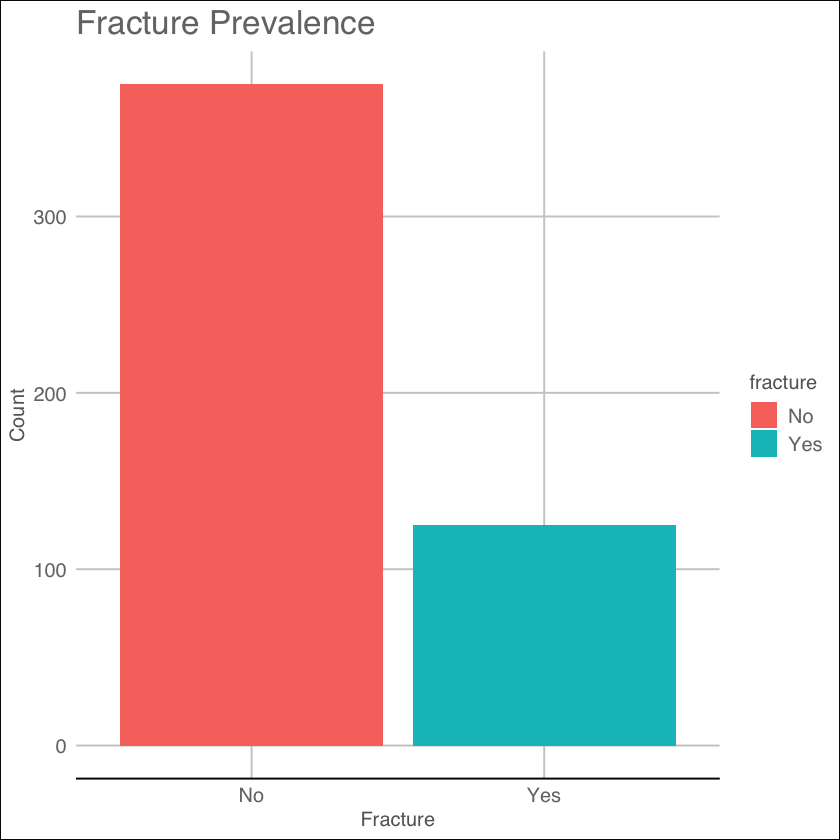

In [4]:
# Fracture Prevalence
bone %>%
    group_by(fracture) %>%
    summarise(Count = n()) %>%
    mutate(Percent = round(Count / sum(Count), 3)) %>%
    rename(Fracture = fracture) %>%
    kable("html", caption = "Fracture Prevalence") %>%
    kable_styling("striped", full_width = F)

bone %>%
    ggplot(aes(x = fracture, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture Prevalence", x = "Fracture", y = "Count")

The data set is imbalanced. There are 375 patients with no fracture and 125 patients with a fracture.

**Sub ID:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   125.8   250.5   250.5   375.2   500.0 

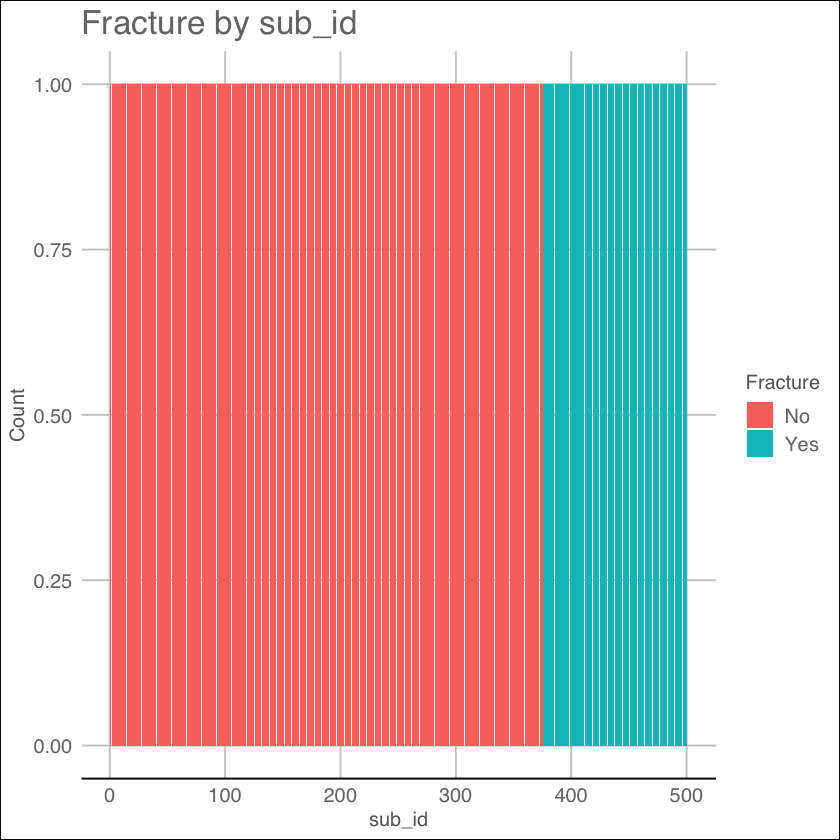

In [5]:
summary(bone$sub_id)

# Fracture by sub_id
bone %>%
    ggplot(aes(x = sub_id, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by sub_id", x = "sub_id", y = "Count", fill = "Fracture")

The variable `sub_id` is a unique identifier for each patient. This variable will not be used in the model.

**Site ID:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.436   5.000   6.000 

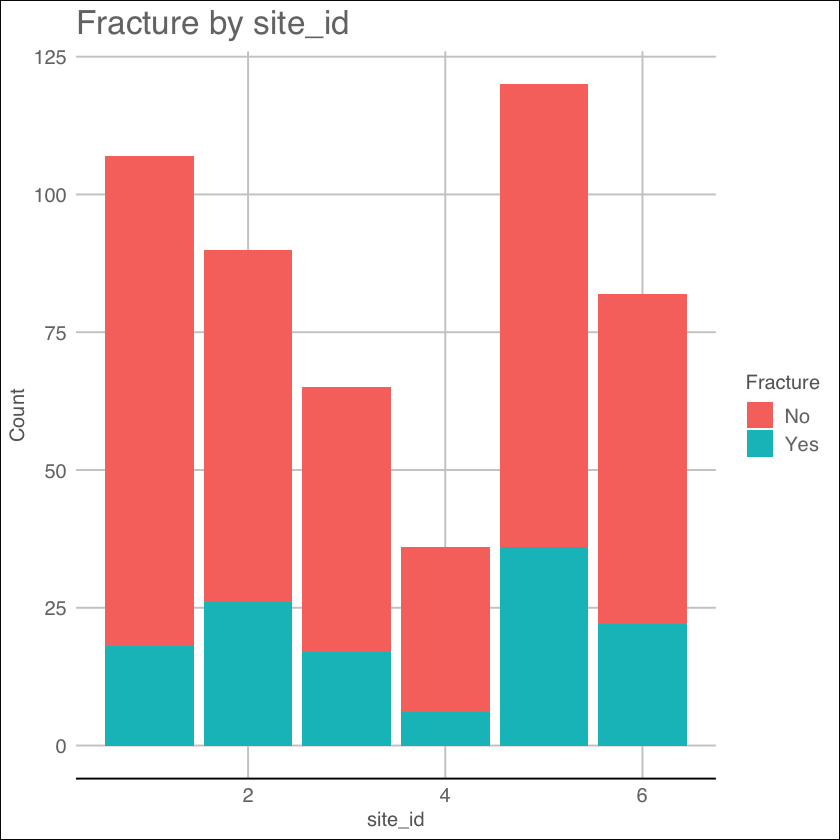

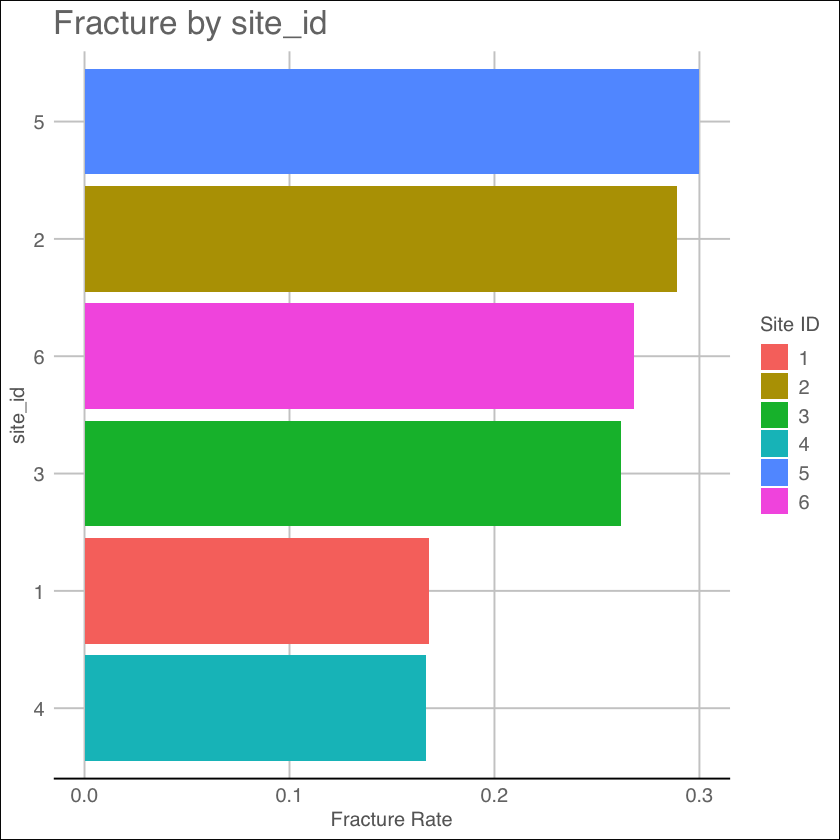

In [6]:
summary(bone$site_id)

# Fracture by site_id
bone %>%
    ggplot(aes(x = site_id, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by site_id", x = "site_id", y = "Count", fill = "Fracture")

# Fracture by site_id as a proportion
bone %>%
    group_by(site_id) %>%
    summarise(Fracture = sum(fracture.num) / n()) %>%
    ggplot(aes(x = reorder(site_id, Fracture), y = Fracture, fill = factor(site_id))) +
    geom_col() +
    coord_flip() +
    theme_gdocs() +
    labs(
        title = "Fracture by site_id",
        x = "site_id",
        y = "Fracture Rate",
        fill = "Site ID"
    )

The variable `site_id` is a unique identifier for each site. Although there are differences, we don't believe that `site_id` contains useful information. This variable will not be used in the model.

**Physician ID:**

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture Rate by Physician</caption>
 <thead>
  <tr>
   <th style="text-align:right;"> Physician ID </th>
   <th style="text-align:right;"> Patients </th>
   <th style="text-align:right;"> Fracture </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 301 </td>
   <td style="text-align:right;"> 15 </td>
   <td style="text-align:right;"> 0.400 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 287 </td>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 0.429 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 294 </td>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 0.214 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 309 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 0.308 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 37 </td>
   <td style

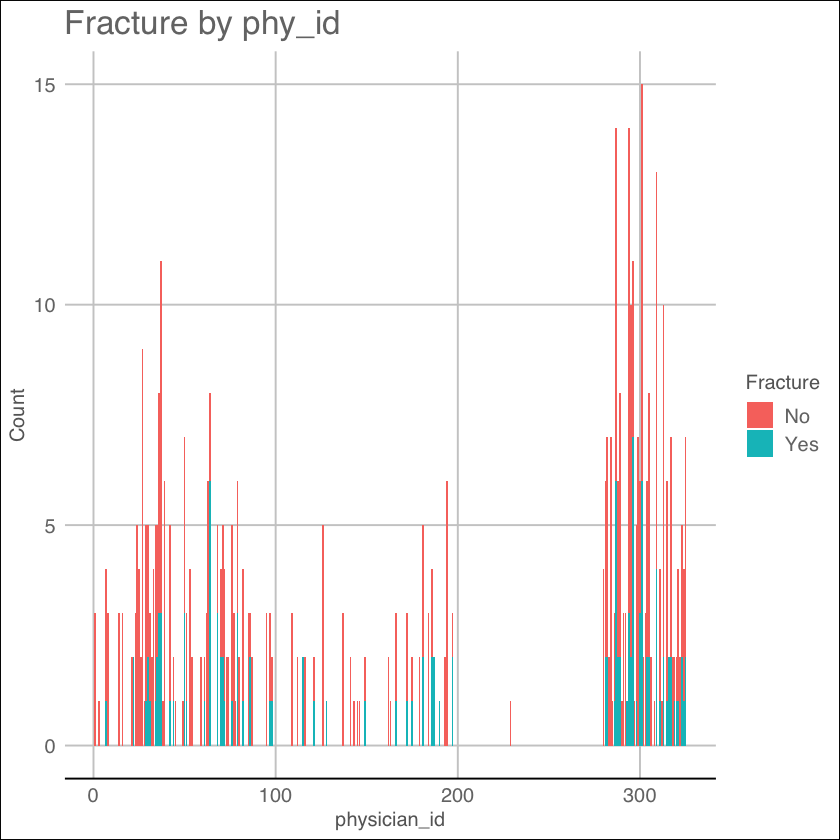

In [7]:
# Investigate how many patients each physician has
# And whether any physicians have a high fracture rate
bone %>%
    group_by(phy_id) %>%
    summarise(Patients = n(), Fracture = sum(fracture.num) / n()) %>%
    mutate(Fracture = round(Fracture, 3)) %>%
    arrange(desc(Patients)) %>%
    filter(Patients > 5) %>%
    rename(`Physician ID` = phy_id) %>%
    kable("html", caption = "Fracture Rate by Physician") %>%
    kable_styling("striped", full_width = F)

# Fracture by physician_id
bone %>%
    ggplot(aes(x = phy_id, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by phy_id", x = "physician_id", y = "Count", fill = "Fracture")

Fracture rates vary across physicians, but each physician has a small number of patients so variance is expected. This variable will not be used in the model.

**Prior Fractures:**

No Yes 
374 126

`summarise()` has grouped output by 'priorfrac'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Prior Fracture</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Prior Fracture </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.805 </td>
   <td style="text-align:right;"> 0.195 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.587 </td>
   <td style="text-align:right;"> 0.413 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$priorfrac
p-value = 2.683e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.822147 4.583027
sample estimates:
odds ratio 
  2.890213 


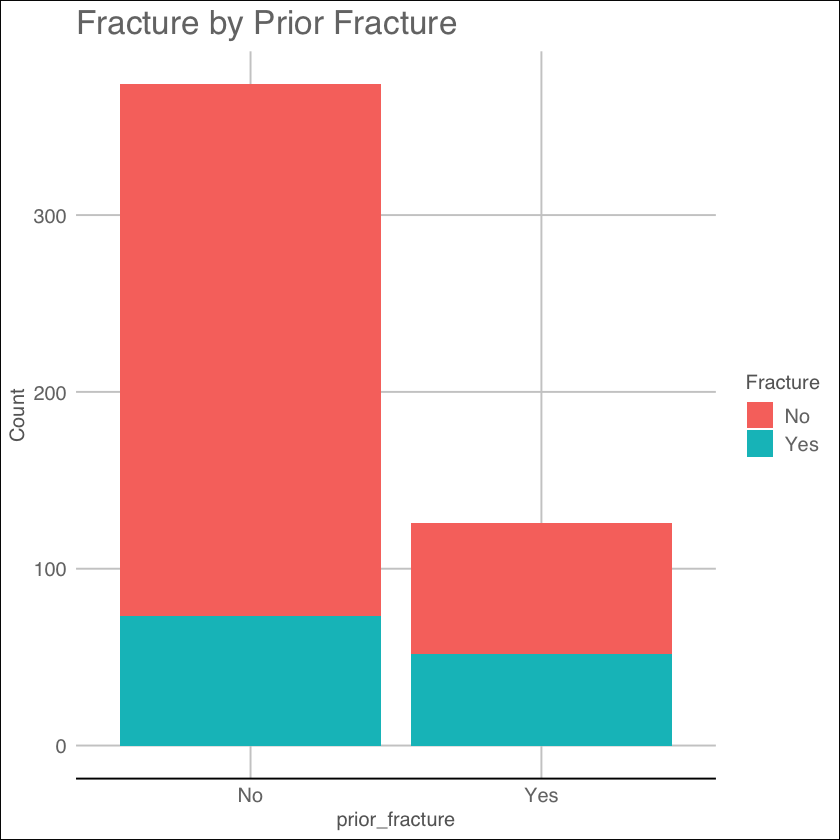

In [8]:
summary(factor(bone$priorfrac))

# 2x2 Table of prior fracture and fracture
bone %>%
    group_by(priorfrac, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Prior Fracture` = priorfrac) %>%
    kable("html", caption = "Fracture by Prior Fracture") %>%
    kable_styling("striped", full_width = F)

# Fracture by prior_fracture
bone %>%
    ggplot(aes(x = priorfrac, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Prior Fracture", x = "prior_fracture", y = "Count", fill = "Fracture")

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$priorfrac)

Approximately one quarter of participants have had a prior fracture, which is similar to the post fracture rate. Patients with a prior fracture appear approximately twice as likely to have a fracture during the study.

**Age:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  55.00   61.00   67.00   68.56   76.00   90.00 

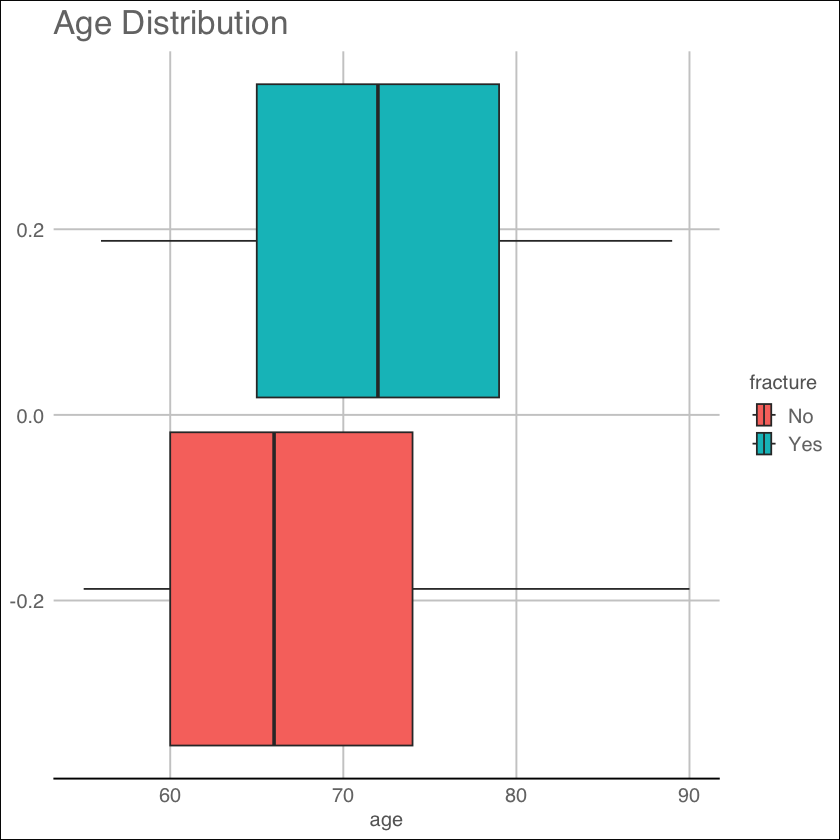

`geom_smooth()` using formula = 'y ~ x'


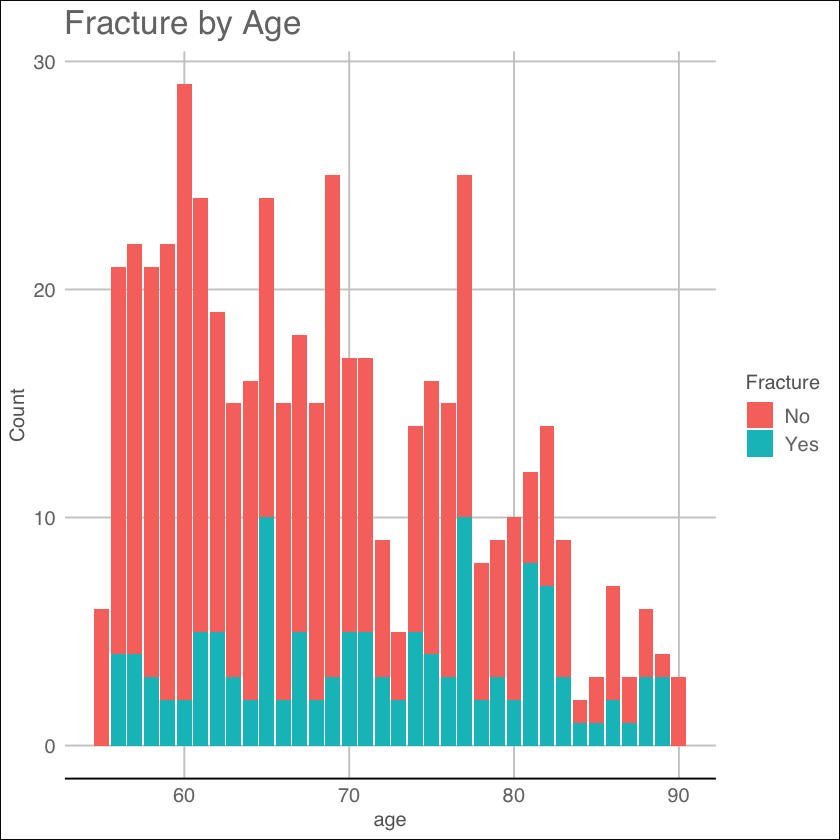


	Welch Two Sample t-test

data:  age by fracture
t = -4.6184, df = 203.81, p-value = 6.844e-06
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -6.145258 -2.468075
sample estimates:
 mean in group No mean in group Yes 
         67.48533          71.79200 


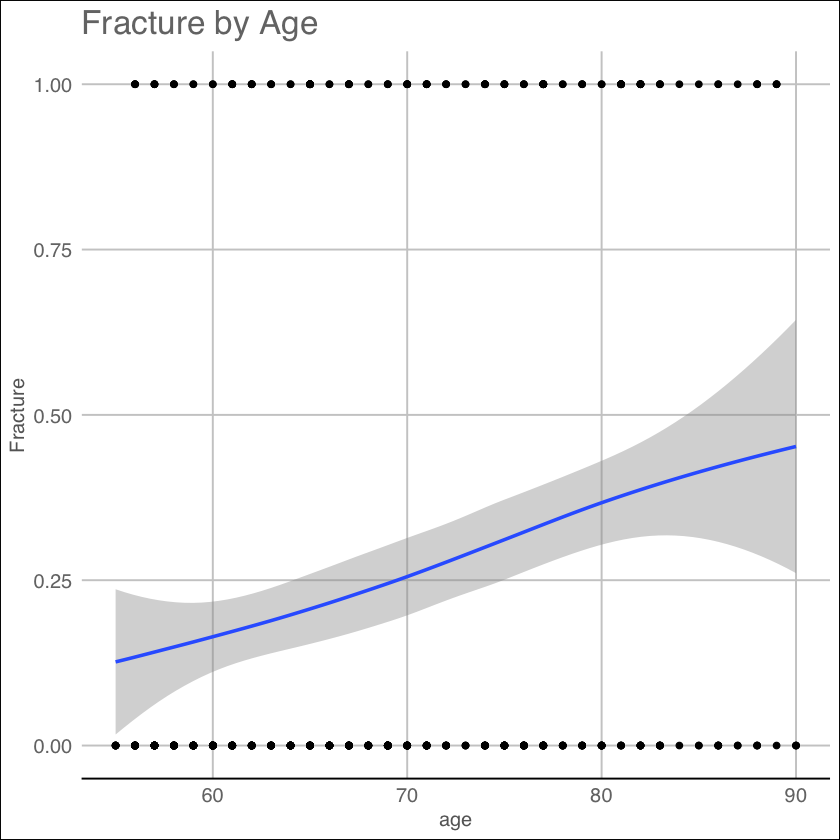

In [9]:
summary(bone$age)
bone %>%
    ggplot(aes(x = age, fill = fracture)) +
    # geom_histogram(bins = 20) +
    geom_boxplot() +
    theme_gdocs() +
    labs(title = "Age Distribution", x = "age")

# Fracture by age
bone %>%
    ggplot(aes(x = age, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Age", x = "age", y = "Count", fill = "Fracture")

# Loess curve of fracture by age
bone %>%
    ggplot(aes(x = age, y = fracture.num)) +
    geom_point() +
    geom_smooth(method = "loess", span = 1) +
    theme_gdocs() +
    labs(title = "Fracture by Age", x = "age", y = "Fracture")

# T-test for difference in age between fracture and no fracture
t.test(age ~ fracture, data = bone)

The age of patients with fractures is significantly higher than without (p < 0.001 from Welch's Two Sample t-test). Fractures appear evenly distributed across ages, although there are fewer patients on the older end of the age range enrolled in the study. We expect that the likelihood of a fracture increases with age and that this predictor will be important in the model.

**Weight:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.90   59.90   68.00   71.82   81.30  127.00 

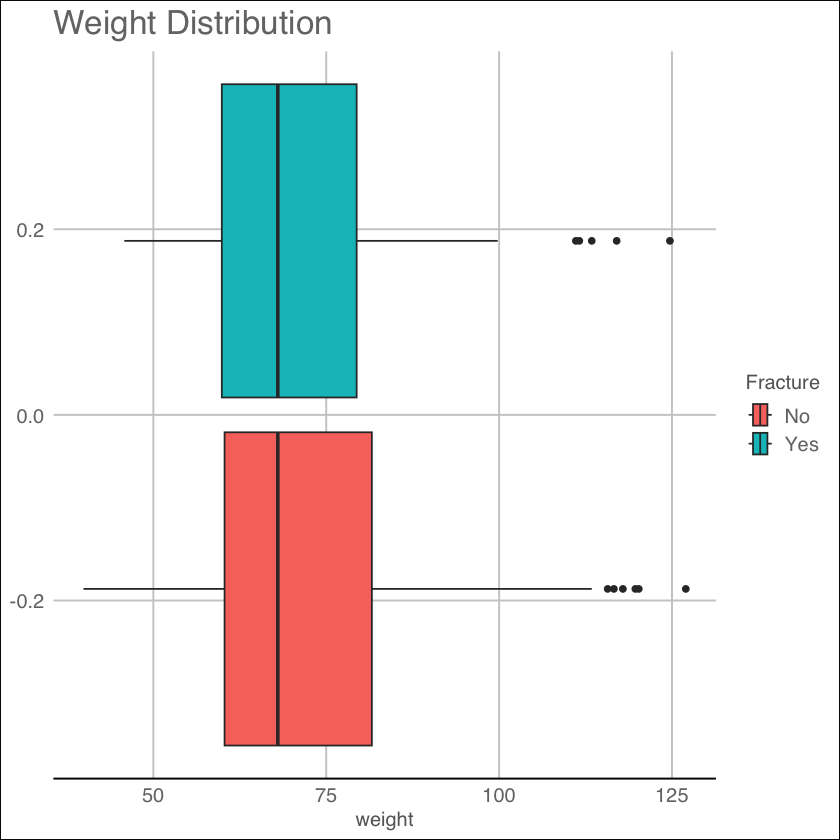

`geom_smooth()` using formula = 'y ~ x'


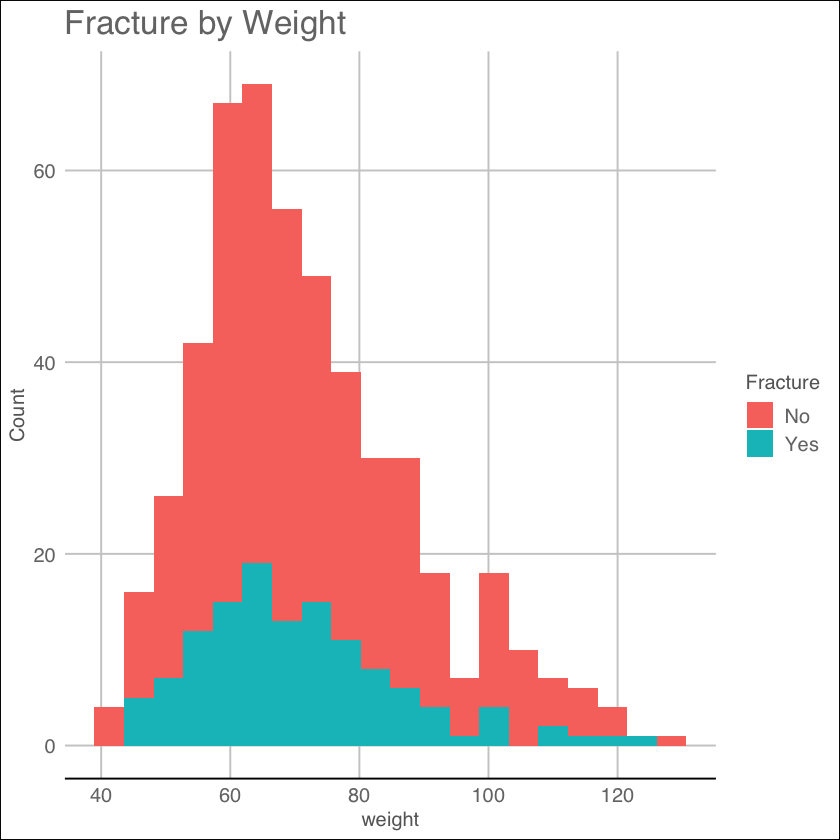


	Welch Two Sample t-test

data:  weight by fracture
t = 0.83719, df = 225.61, p-value = 0.4034
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -1.861305  4.611171
sample estimates:
 mean in group No mean in group Yes 
         72.16693          70.79200 


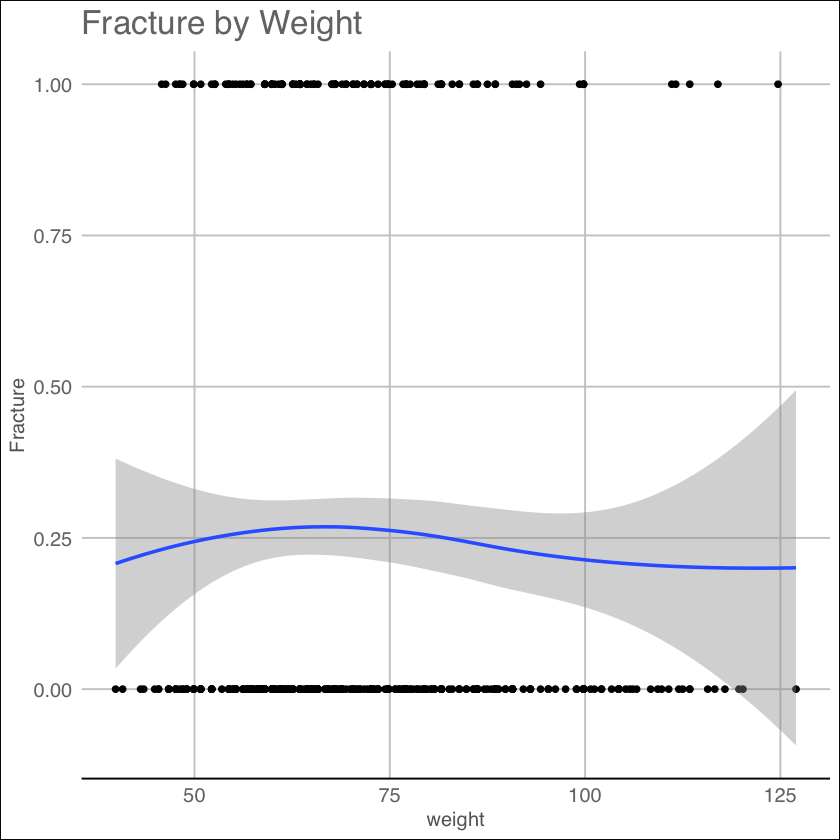

In [10]:
summary(bone$weight)

# Weight distribution by fracture
bone %>%
    ggplot(aes(x = weight, fill = fracture)) +
    geom_boxplot() +
    theme_gdocs() +
    labs(title = "Weight Distribution", x = "weight", fill = "Fracture")

# Fracture by weight
bone %>%
    ggplot(aes(x = weight, fill = fracture)) +
    geom_histogram(bins = 20) +
    theme_gdocs() +
    labs(title = "Fracture by Weight", x = "weight", y = "Count", fill = "Fracture")

# Loess curve of fracture by weight
bone %>%
    ggplot(aes(x = weight, y = fracture.num)) +
    geom_point() +
    geom_smooth(method = "loess", span = 1) +
    theme_gdocs() +
    labs(title = "Fracture by Weight", x = "weight", y = "Fracture")

# T-test for difference in weight between fracture and no fracture
t.test(weight ~ fracture, data = bone)

Weight does not appear to have an effect on fracture rate. The distribution of weight is similar between patients with and without fractures. We expect that this predictor will not be important in the model.

**Height:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  134.0   157.0   161.5   161.4   165.0   199.0 

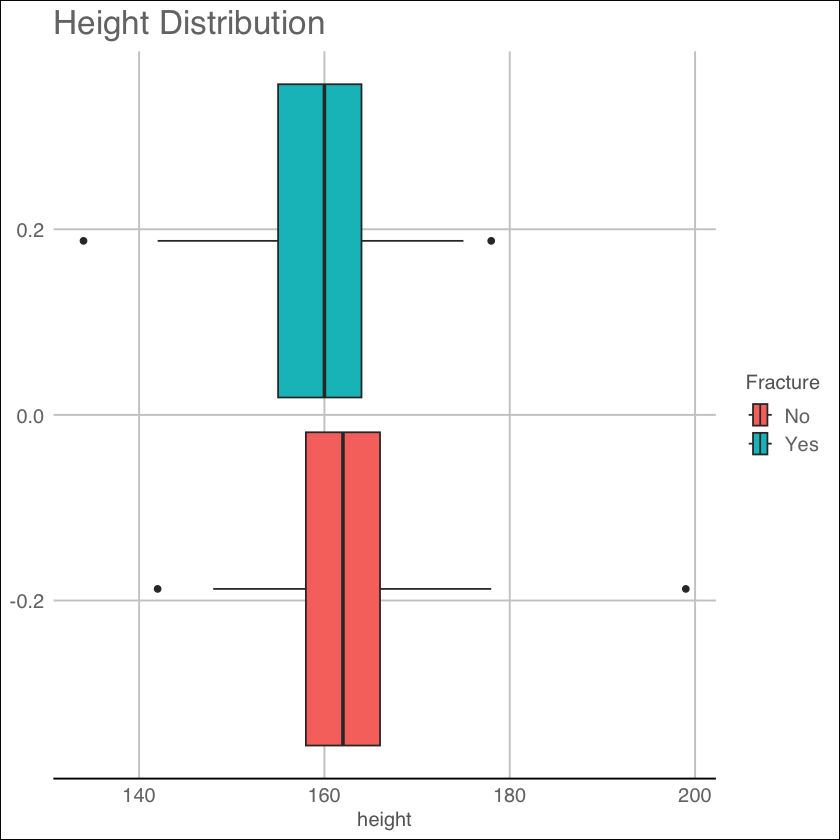

`geom_smooth()` using formula = 'y ~ x'


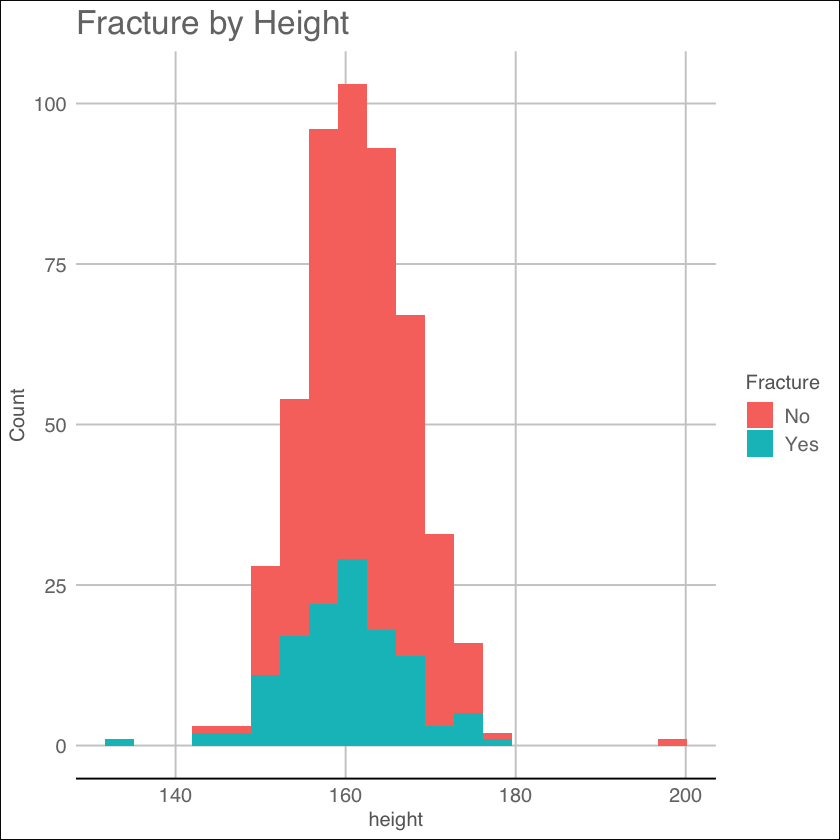


	Welch Two Sample t-test

data:  height by fracture
t = 2.9031, df = 194.07, p-value = 0.004123
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 0.6412751 3.3587249
sample estimates:
 mean in group No mean in group Yes 
          161.864           159.864 


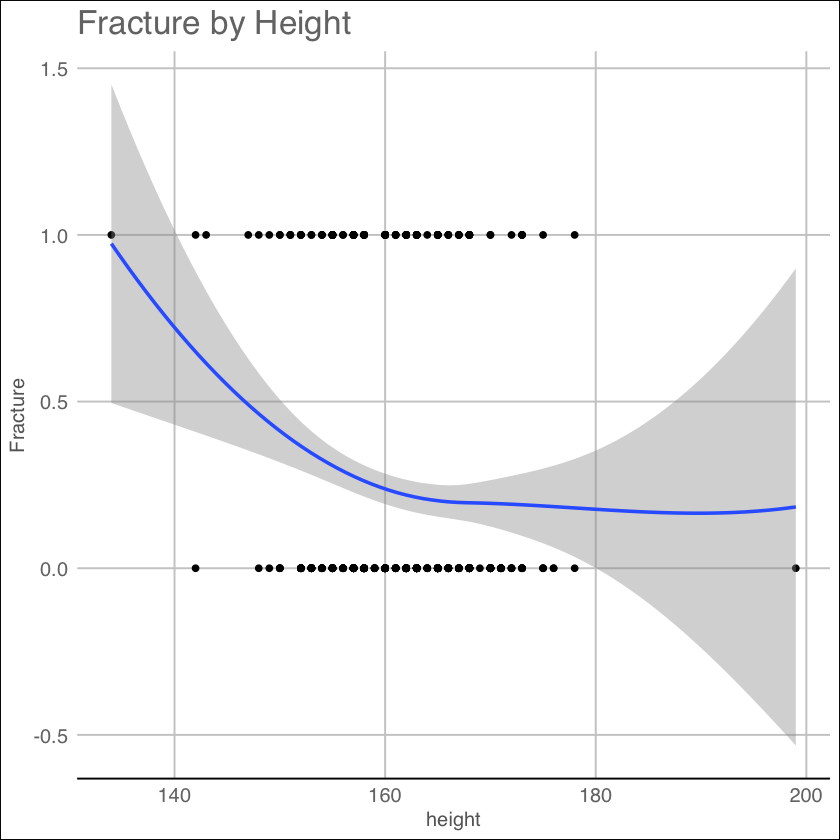

In [11]:
summary(bone$height)

# Height distribution by fracture
bone %>%
    ggplot(aes(x = height, fill = fracture)) +
    geom_boxplot() +
    theme_gdocs() +
    labs(title = "Height Distribution", x = "height", fill = "Fracture")

# Fracture by height
bone %>%
    ggplot(aes(x = height, fill = fracture)) +
    geom_histogram(bins = 20) +
    theme_gdocs() +
    labs(title = "Fracture by Height", x = "height", y = "Count", fill = "Fracture")

# Loess curve of fracture by height
bone %>%
    ggplot(aes(x = height, y = fracture.num)) +
    geom_point() +
    geom_smooth(method = "loess", span = 1) +
    theme_gdocs() +
    labs(title = "Fracture by Height", x = "height", y = "Fracture")

# T-test for difference in height between fracture and no fracture
t.test(height ~ fracture, data = bone)

Height does not appear to have an effect on fracture rate. The distribution of height is similar between patients with and without fractures. A two sample t-test suggests the mean weights have a statistically significant difference, but not a practical one. We expect that this predictor will not be important in the model.

**BMI:**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.88   23.27   26.42   27.55   30.79   49.08 

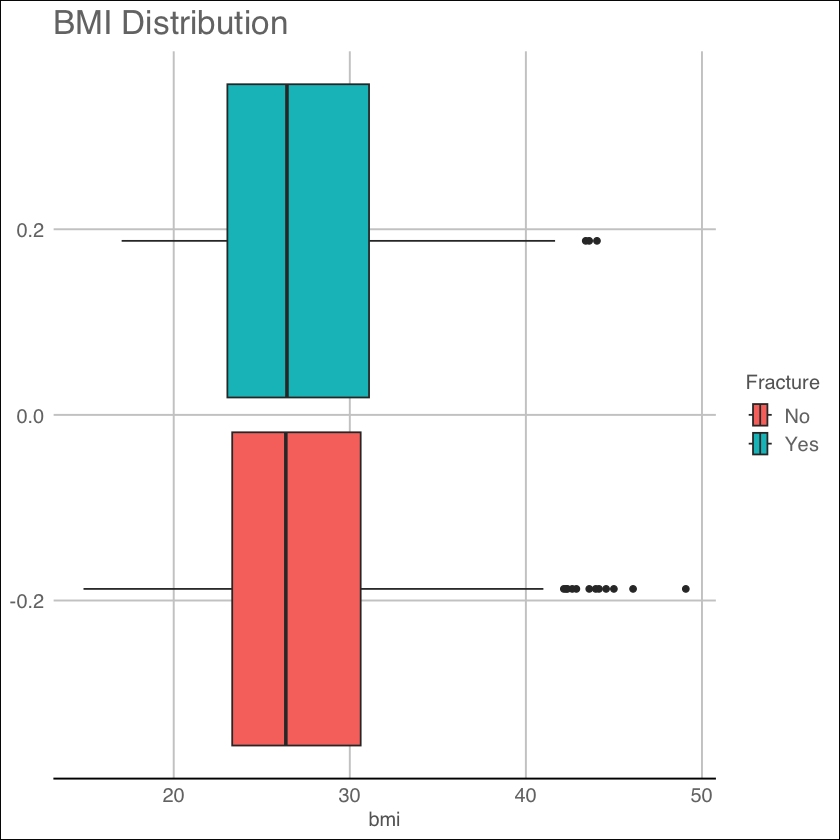

`geom_smooth()` using formula = 'y ~ x'


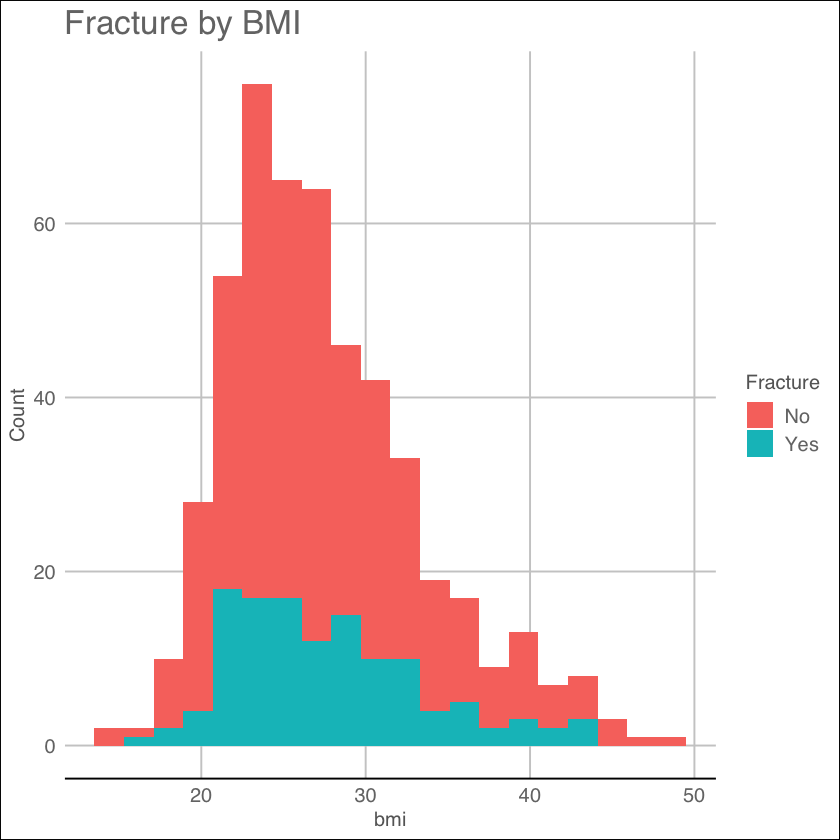


	Welch Two Sample t-test

data:  bmi by fracture
t = -0.33916, df = 217.86, p-value = 0.7348
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -1.4066993  0.9936373
sample estimates:
 mean in group No mean in group Yes 
         27.50140          27.70793 


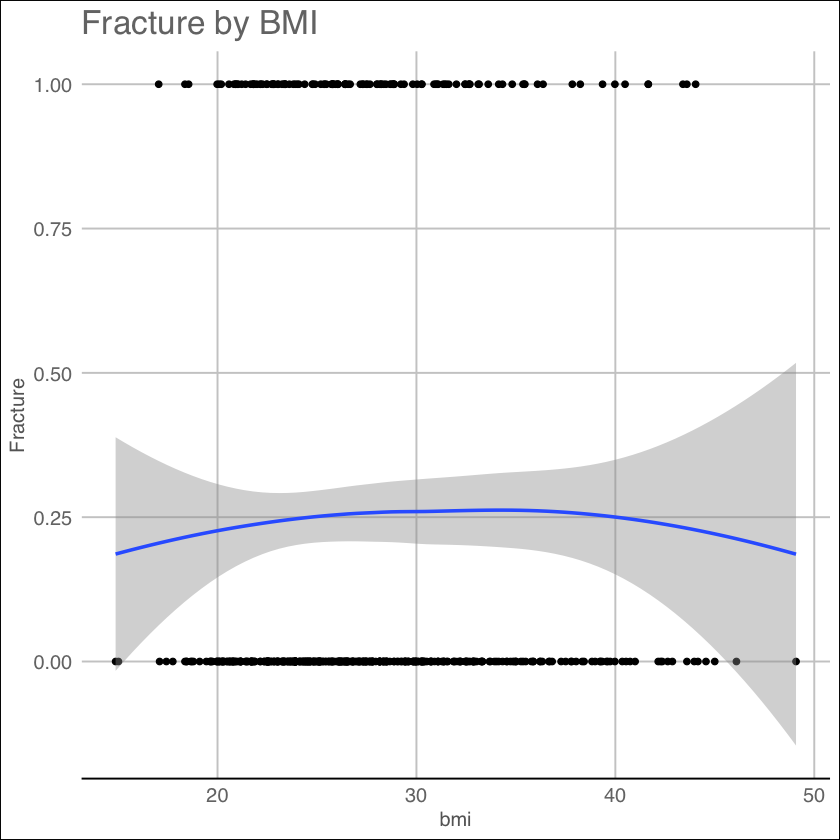

In [12]:
summary(bone$bmi)

# BMI distribution by fracture
bone %>%
    ggplot(aes(x = bmi, fill = fracture)) +
    geom_boxplot() +
    theme_gdocs() +
    labs(title = "BMI Distribution", x = "bmi", fill = "Fracture")

# Fracture by bmi
bone %>%
    ggplot(aes(x = bmi, fill = fracture)) +
    geom_histogram(bins = 20) +
    theme_gdocs() +
    labs(title = "Fracture by BMI", x = "bmi", y = "Count", fill = "Fracture")

# Loess curve of fracture by bmi
bone %>%
    ggplot(aes(x = bmi, y = fracture.num)) +
    geom_point() +
    geom_smooth(method = "loess", span = 1) +
    theme_gdocs() +
    labs(title = "Fracture by BMI", x = "bmi", y = "Fracture")

# T-test for difference in bmi between fracture and no fracture
t.test(bmi ~ fracture, data = bone)

BMI does not appear to have an effect on fracture rate.

**Early Menopause (<45):**

No Yes 
403  97

`summarise()` has grouped output by 'premeno'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Early Menopause</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Early Menopause </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.752 </td>
   <td style="text-align:right;"> 0.248 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.742 </td>
   <td style="text-align:right;"> 0.258 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$premeno
p-value = 0.8962
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6050303 1.7861989
sample estimates:
odds ratio 
  1.051975 


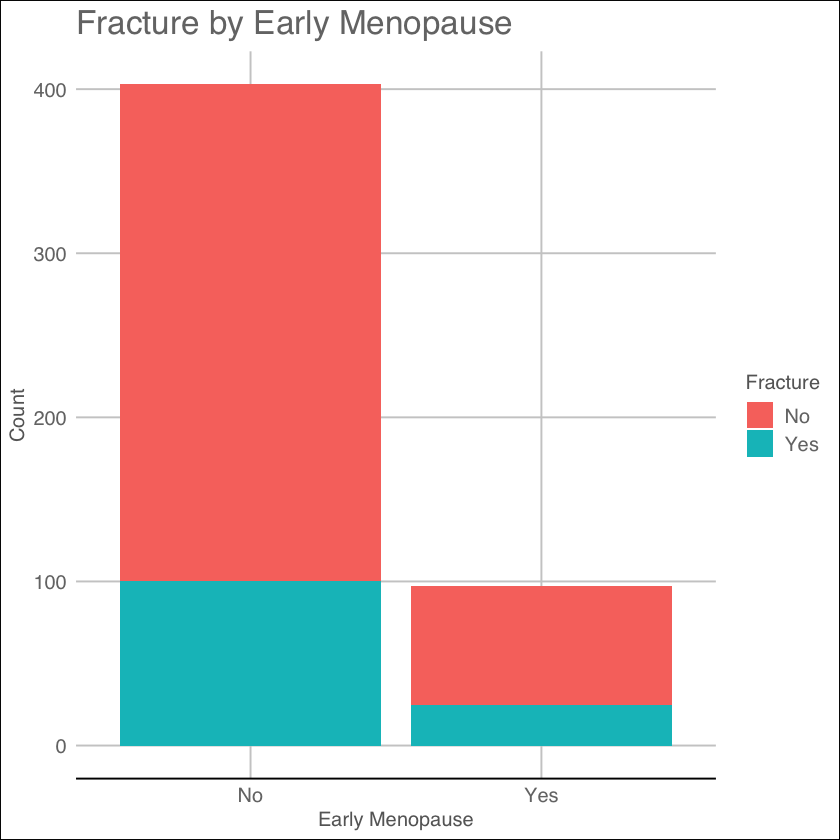

In [13]:
summary(factor(bone$premeno))

# 2x2 Table of premenopausal and fracture
bone %>%
    group_by(premeno, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Early Menopause` = premeno) %>%
    kable("html", caption = "Fracture by Early Menopause") %>%
    kable_styling("striped", full_width = F)

# Fracture by premeno
bone %>%
    ggplot(aes(x = premeno, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Early Menopause", x = "Early Menopause", y = "Count", fill = "Fracture")

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$premeno)

Menopause does not appear to affect the observed fracture rate. Both early and typical menopausal onset groups have a fracture rate of approximately 25%. We expect that this predictor will not be important in the model.

**Maternal Hip Fracture:**

No Yes 
435  65

`summarise()` has grouped output by 'momfrac'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Maternal Hip Fracture</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Maternal Hip Fracture </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.768 </td>
   <td style="text-align:right;"> 0.232 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.631 </td>
   <td style="text-align:right;"> 0.369 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$momfrac
p-value = 0.02127
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.062961 3.457099
sample estimates:
odds ratio 
  1.932961 


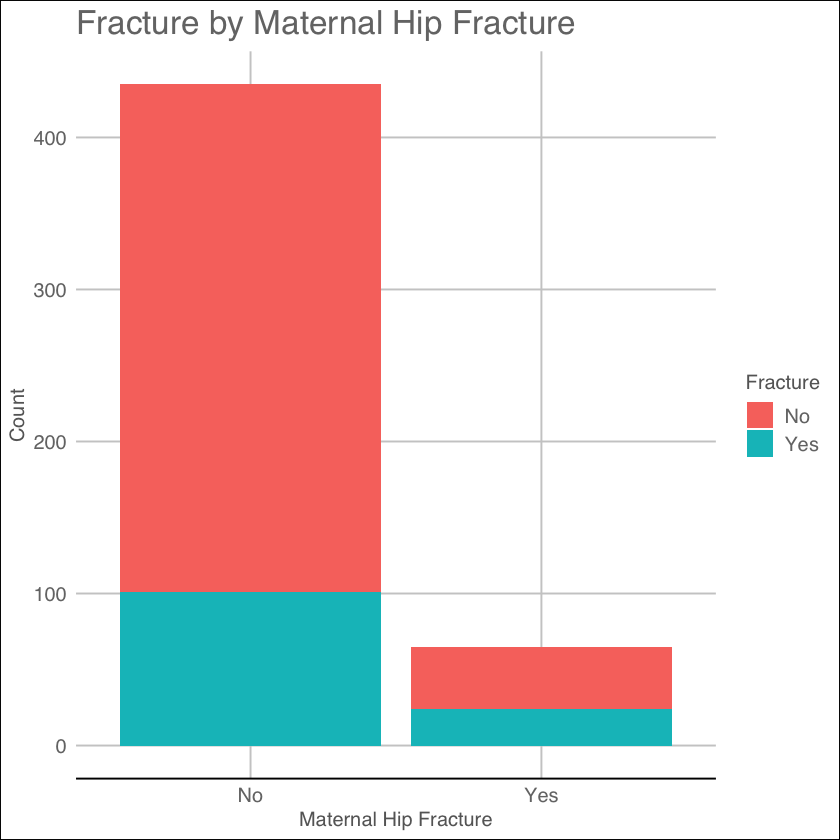

In [14]:
summary(factor(bone$momfrac))

# 2x2 Table of maternal hip fracture and fracture
bone %>%
    group_by(momfrac, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Maternal Hip Fracture` = momfrac) %>%
    kable("html", caption = "Fracture by Maternal Hip Fracture") %>%
    kable_styling("striped", full_width = F)

# Fracture by momfrac
bone %>%
    ggplot(aes(x = momfrac, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Maternal Hip Fracture", x = "Maternal Hip Fracture", y = "Count", fill = "Fracture")

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$momfrac)

History of hip fracture in the subject's mother appears to be a strong predictor of fracture. It is associated with a 1.9x increase in the odds of observing a fracture (p = 0.02 from Fisher's Exact test) compared to women without maternal hip fractures. We expect that this predictor will be important in the model.

**Need Arms to Stand Up:**

No Yes 
312 188

`summarise()` has grouped output by 'armassist'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Need Arms to Stand Up</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Need Arms to Stand Up </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.801 </td>
   <td style="text-align:right;"> 0.199 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.665 </td>
   <td style="text-align:right;"> 0.335 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$armassist
p-value = 0.0009071
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.317783 3.129094
sample estimates:
odds ratio 
  2.029256 


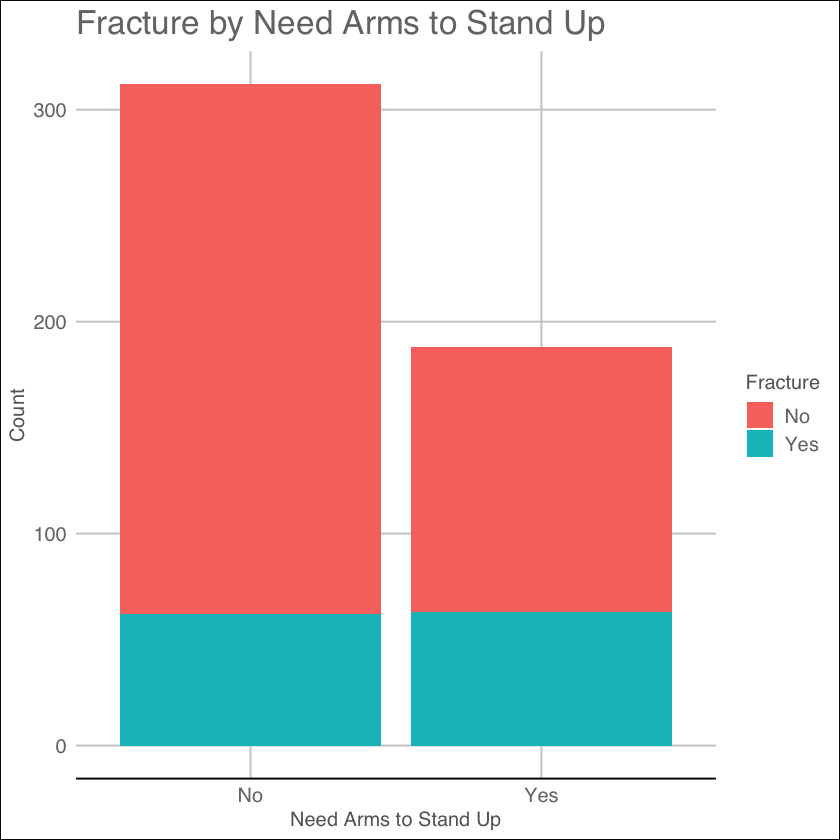

In [15]:
summary(factor(bone$armassist))

# 2x2 Table of arm assist and fracture
bone %>%
    group_by(armassist, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Need Arms to Stand Up` = armassist) %>%
    kable("html", caption = "Fracture by Need Arms to Stand Up") %>%
    kable_styling("striped", full_width = F)

# Fracture by armassist
bone %>%
    ggplot(aes(x = armassist, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Need Arms to Stand Up", x = "Need Arms to Stand Up", y = "Count", fill = "Fracture")

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$armassist)

Requiring the use of arms to stand from a chair appears to be associated with an increased risk of fracture. Positive answers to this question are associated with a 2x odds of fracture (p < 0.0001 from Fisher's Exact test). We expect that this predictor will be important in the model.

**Smoking:**

No Yes 
465  35

`summarise()` has grouped output by 'smoke'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Smoking</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Smoking </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.746 </td>
   <td style="text-align:right;"> 0.254 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.800 </td>
   <td style="text-align:right;"> 0.200 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$smoke
p-value = 0.5496
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.264191 1.782237
sample estimates:
odds ratio 
 0.7356144 


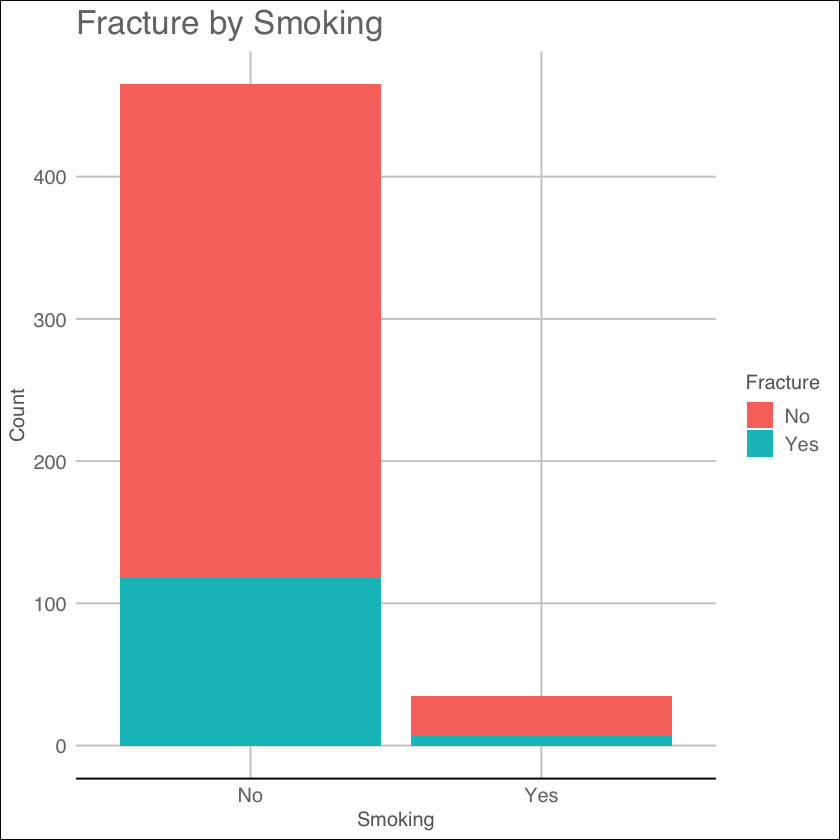

In [16]:
summary(factor(bone$smoke))

# 2x2 Table of smoking and fracture
bone %>%
    group_by(smoke, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Smoking` = smoke) %>%
    kable("html", caption = "Fracture by Smoking") %>%
    kable_styling("striped", full_width = F)

# Fracture by smoke
bone %>%
    ggplot(aes(x = smoke, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Smoking", x = "Smoking", y = "Count", fill = "Fracture")

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$smoke)

Smoking does not appear to be associate with a change in fracture rate.

**Self-reported Risk:**

Less    Same Greater 
    167     186     147

`summarise()` has grouped output by 'raterisk'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Self-reported Risk</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Self-reported Risk </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Less </td>
   <td style="text-align:right;"> 0.832 </td>
   <td style="text-align:right;"> 0.168 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Same </td>
   <td style="text-align:right;"> 0.742 </td>
   <td style="text-align:right;"> 0.258 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Greater </td>
   <td style="text-align:right;"> 0.667 </td>
   <td style="text-align:right;"> 0.333 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$raterisk
p-value = 0.002859
alternative hypothesis: two.sided



Call:
glm(formula = fracture ~ raterisk, family = "binomial", data = bone)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.6023     0.2071  -7.735 1.03e-14 ***
rateriskSame      0.5462     0.2664   2.050   0.0404 *  
rateriskGreater   0.9091     0.2711   3.353   0.0008 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 562.34  on 499  degrees of freedom
Residual deviance: 550.58  on 497  degrees of freedom
AIC: 556.58

Number of Fisher Scoring iterations: 4


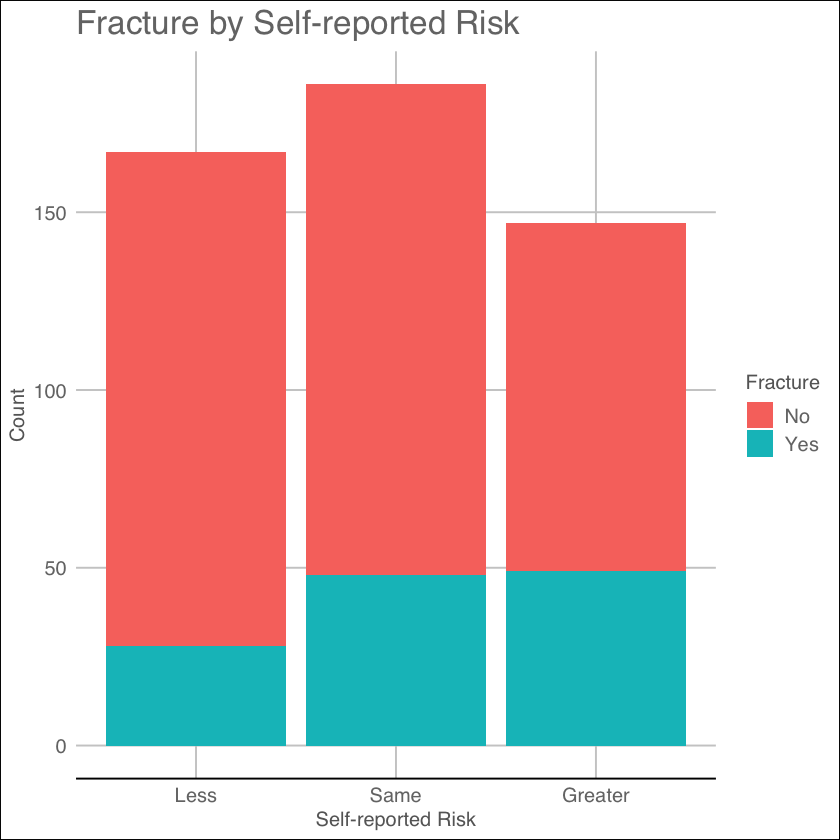

In [17]:
summary(factor(bone$raterisk))

# Fracture by raterisk
bone %>%
    ggplot(aes(x = raterisk, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Self-reported Risk", x = "Self-reported Risk", y = "Count", fill = "Fracture")

# Table of fracture prevalence by raterisk
bone %>%
    group_by(raterisk, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Self-reported Risk` = raterisk) %>%
    kable("html", caption = "Fracture by Self-reported Risk") %>%
    kable_styling("striped", full_width = F)

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$raterisk)

# Logistic regression for difference
glm(fracture ~ raterisk, data = bone, family = "binomial") %>%
    summary()

Self-reported risk of fracture appears to be a strongly associated with fractures. Fracture rates are greater as self-reported risk increases, and each level is statistically significantly different from the previous (p < 0.05 from Logistic Regression). The risk scores are approximately evenly distributed between levels. We expect that this predictor will be important in the model.

Additionally, self-reported risk does not appear to be related to height or weight, but is influenced by the presence of a prior fracture:

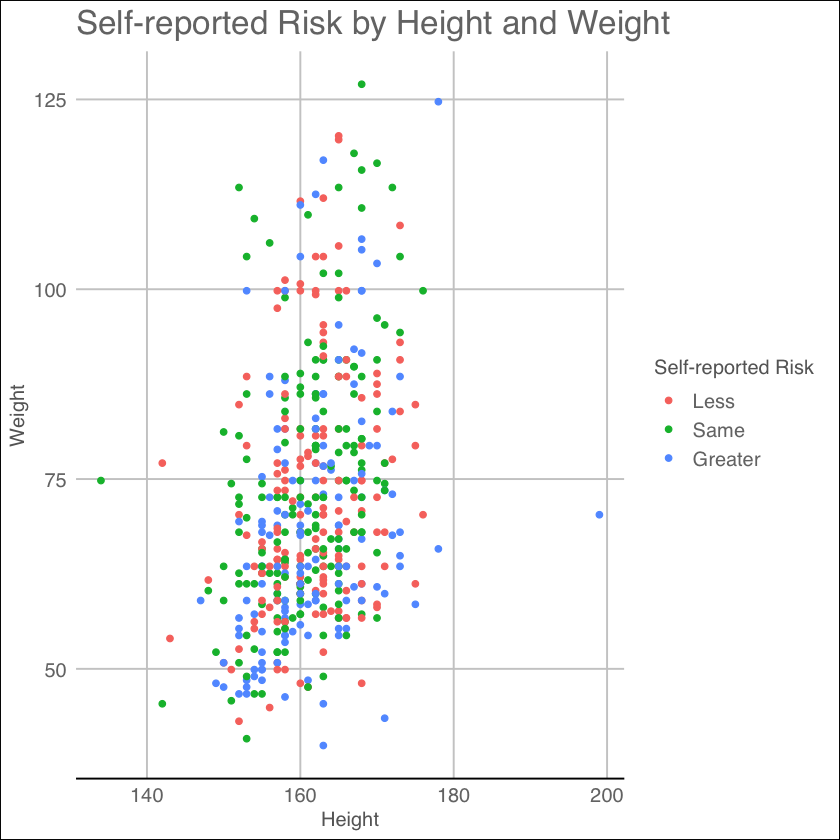

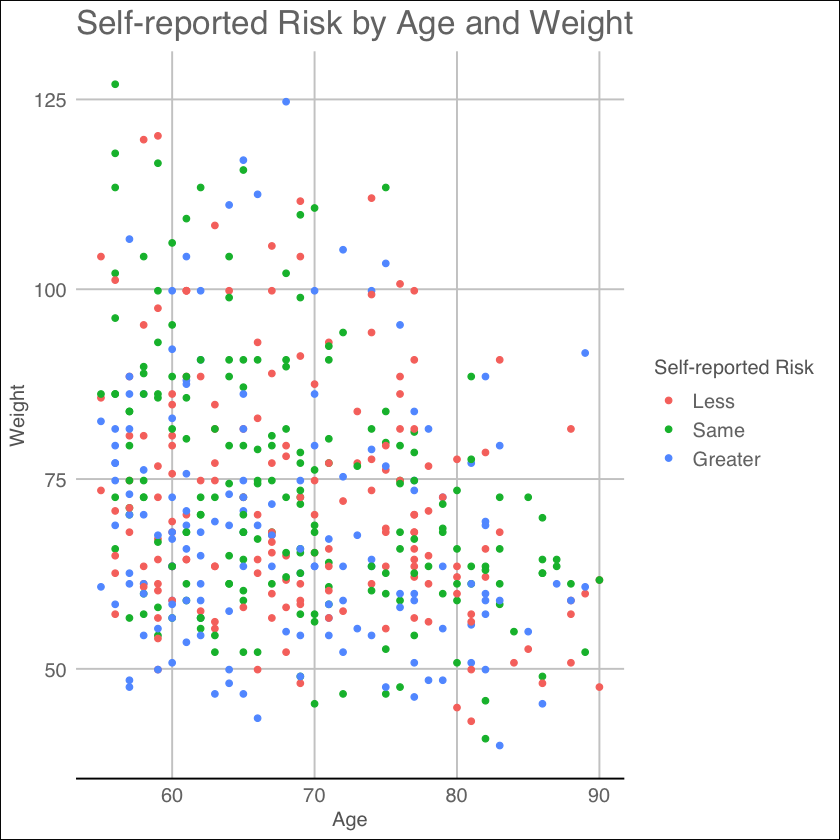

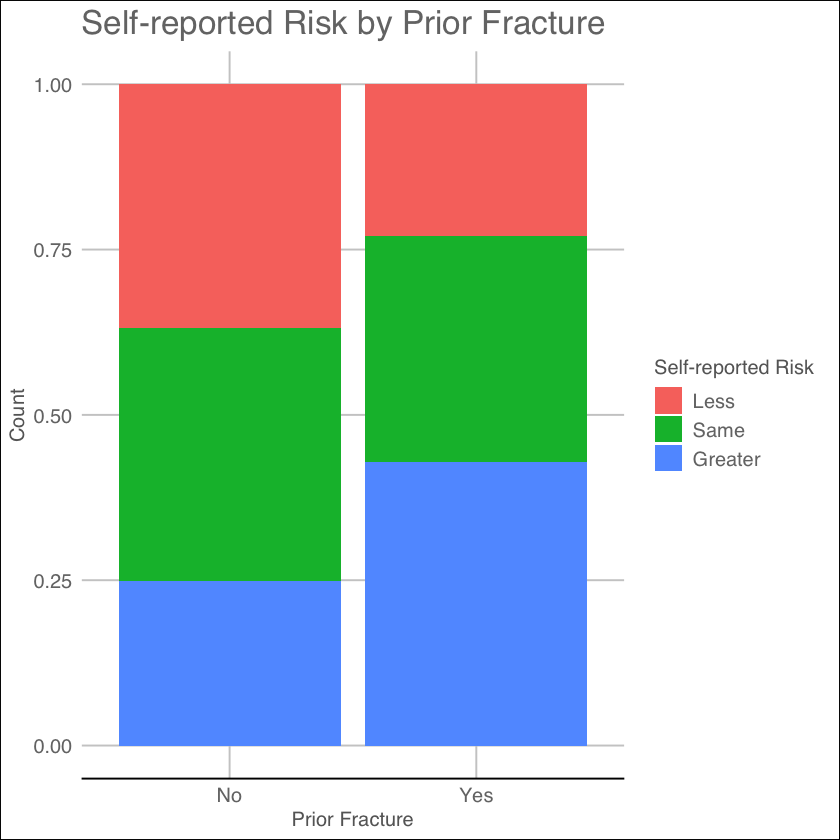

In [18]:
ggplot(glow_bonemed, aes(y = weight, x = height, color = raterisk)) +
    geom_point() +
    theme_gdocs() +
    labs(title = "Self-reported Risk by Height and Weight", x = "Height", y = "Weight", color = "Self-reported Risk")

ggplot(glow_bonemed, aes(x = age, y = weight, color = raterisk)) +
    geom_point() +
    theme_gdocs() +
    labs(title = "Self-reported Risk by Age and Weight", x = "Age", y = "Weight", color = "Self-reported Risk")

ggplot(glow_bonemed, aes(priorfrac, fill = raterisk)) +
    geom_bar(position = "fill") +
    theme_gdocs() +
    labs(title = "Self-reported Risk by Prior Fracture", x = "Prior Fracture", y = "Count", fill = "Self-reported Risk")

**Fracture Risk Score (Composite Risk Score):**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.698   5.000  11.000 

`geom_smooth()` using formula = 'y ~ x'


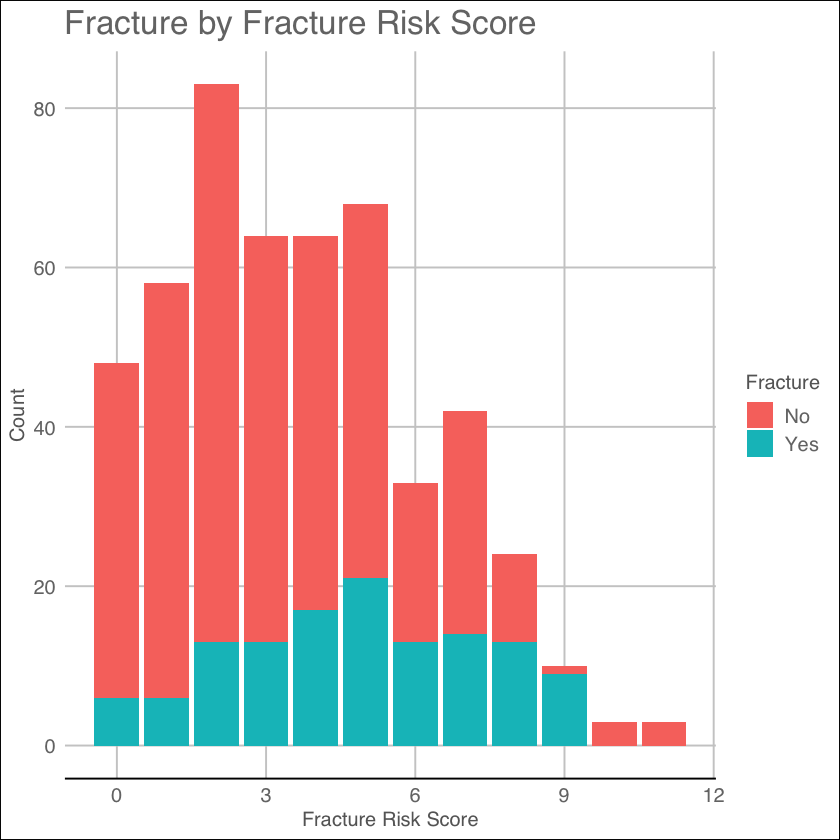

`summarise()` has grouped output by 'fracscore'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Fracture Risk Score</caption>
 <thead>
  <tr>
   <th style="text-align:right;"> Fracture Risk Score </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0.875 </td>
   <td style="text-align:right;"> 0.125 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0.897 </td>
   <td style="text-align:right;"> 0.103 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0.843 </td>
   <td style="text-align:right;"> 0.157 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 0.797 </td>
   <td style="text-align:right;"> 0.203 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 4 </td>
   <td s

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Data with Fracture Risk Score of 10 or 11</caption>
 <thead>
  <tr>
   <th style="text-align:right;"> sub_id </th>
   <th style="text-align:right;"> site_id </th>
   <th style="text-align:right;"> phy_id </th>
   <th style="text-align:left;"> priorfrac </th>
   <th style="text-align:right;"> age </th>
   <th style="text-align:right;"> weight </th>
   <th style="text-align:right;"> height </th>
   <th style="text-align:right;"> bmi </th>
   <th style="text-align:left;"> premeno </th>
   <th style="text-align:left;"> momfrac </th>
   <th style="text-align:left;"> armassist </th>
   <th style="text-align:left;"> smoke </th>
   <th style="text-align:left;"> raterisk </th>
   <th style="text-align:right;"> fracscore </th>
   <th style="text-align:left;"> fracture </th>
   <th style="text-align:left;"> bonemed </th>
   <th style="text-align:left;"> bonemed_fu </th>
   <th style

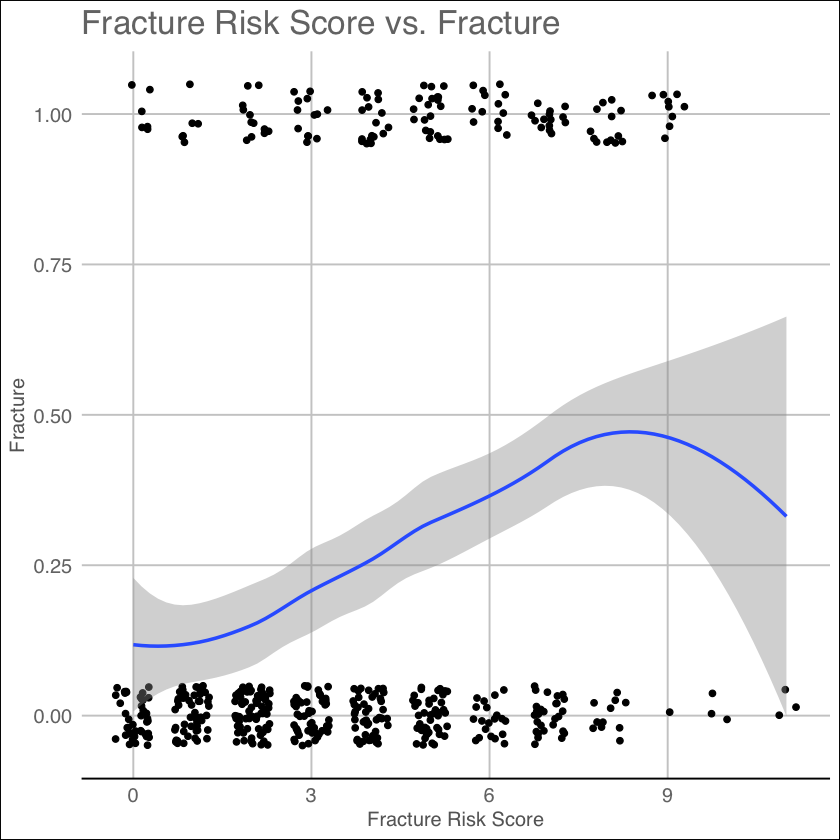

In [19]:
summary((bone$fracscore))

# Fracture by fracscore
bone %>%
    ggplot(aes(x = fracscore, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Fracture Risk Score", x = "Fracture Risk Score", y = "Count", fill = "Fracture")

# Scatterplot using fracture.num and loess curve
bone %>%
    ggplot(aes(x = fracscore, y = fracture.num)) +
    geom_point(position = position_jitter(width = 0.3, height = 0.05)) +
    geom_smooth(method = "loess") +
    theme_gdocs() +
    labs(title = "Fracture Risk Score vs. Fracture", x = "Fracture Risk Score", y = "Fracture")

# Table of fracture prevalence by fracscore
bone %>%
    group_by(fracscore, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Fracture Risk Score` = fracscore) %>%
    kable("html", caption = "Fracture by Fracture Risk Score") %>%
    kable_styling("striped", full_width = F)

# View data with fracscore of 10 and 11
bone %>%
    filter(fracscore == 10 | fracscore == 11) %>%
    kable("html", caption = "Data with Fracture Risk Score of 10 or 11") %>%
    kable_styling("striped", full_width = F)

More information is required to determine whether this is an independent variable or a composite of the other variables. We will include it with caution. Increasing fracture risk score appears to be associated with an increased risk of fracture. The Loess fit indicates an increasing trend with the exception of levels 10 and 11. These levels have a very small sample size, but do not have any fractures. One can imagine that people in this category may be extremely cautions or bedridden. We expect that this predictor will be important in the model, and will consider excluding levels 10 and 11.

**Fracture Risk Score (Composite Risk Score) with levels 10 and 11 excluded:**

`geom_smooth()` using formula = 'y ~ x'


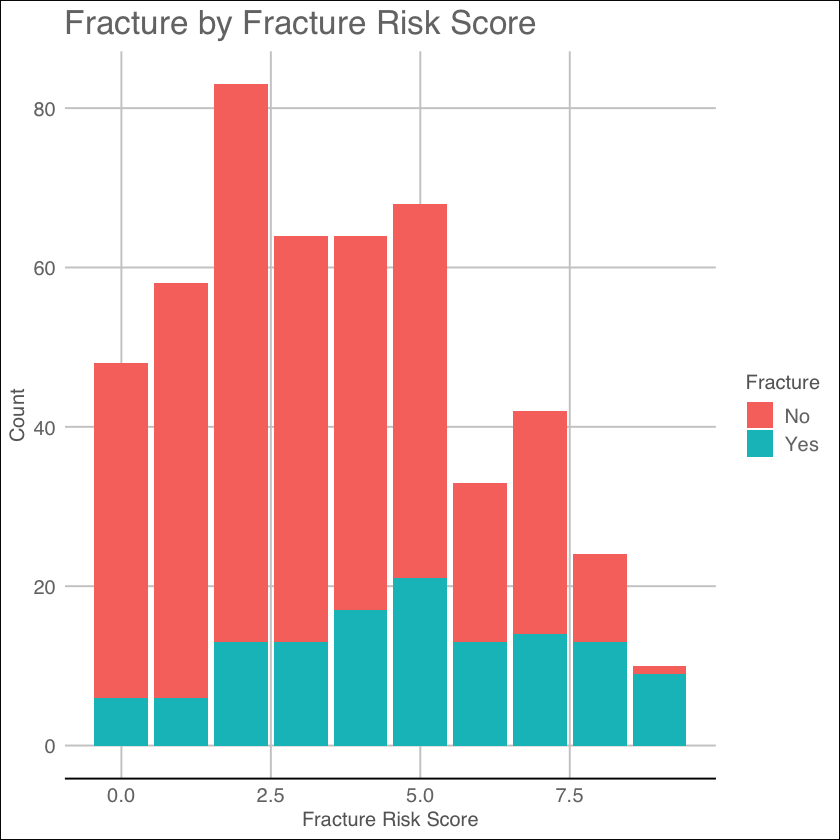

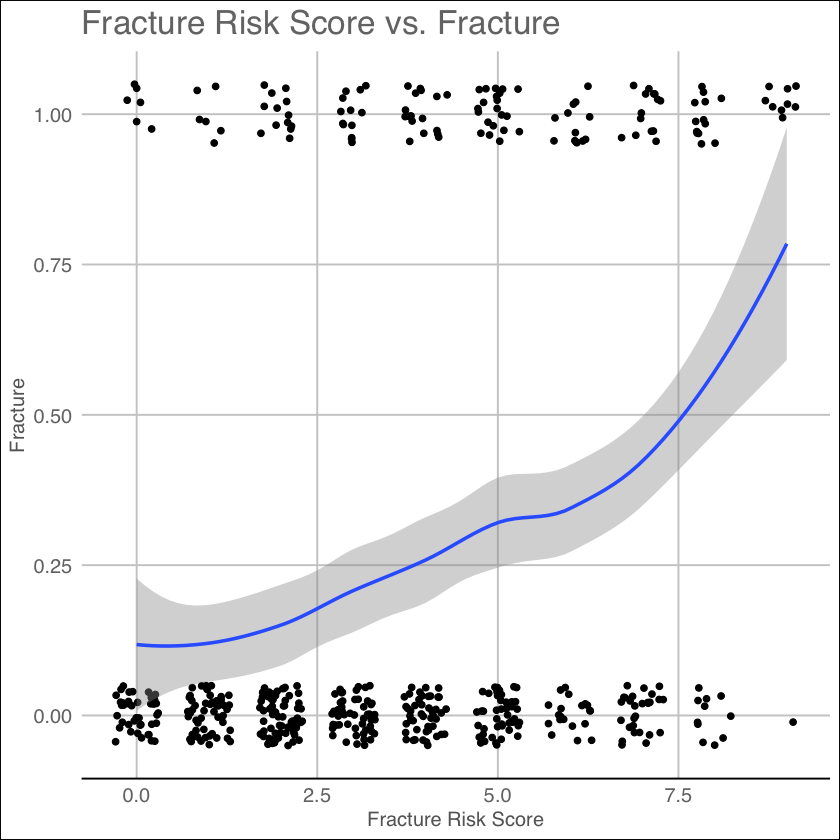

In [20]:
# Fracture by fracscore
bone %>%
    filter(fracscore != 10 & fracscore != 11) %>%
    ggplot(aes(x = fracscore, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(title = "Fracture by Fracture Risk Score", x = "Fracture Risk Score", y = "Count", fill = "Fracture")

# Scatterplot using fracture.num and loess curve
bone %>%
    filter(fracscore != 10 & fracscore != 11) %>%
    ggplot(aes(x = fracscore, y = fracture.num)) +
    geom_point(position = position_jitter(width = 0.3, height = 0.05)) +
    geom_smooth(method = "loess") +
    theme_gdocs() +
    labs(title = "Fracture Risk Score vs. Fracture", x = "Fracture Risk Score", y = "Fracture")

Fracture Risk Score with levels 10 and 11 excluded appears to be a better predictor of fracture.

**Bone Medications at Enrollment:**

No Yes 
371 129

`summarise()` has grouped output by 'bonemed'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Bone Medications at Enrollment</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Bone Medications at Enrollment </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.787 </td>
   <td style="text-align:right;"> 0.213 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.643 </td>
   <td style="text-align:right;"> 0.357 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$bonemed
p-value = 0.002024
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.286032 3.238662
sample estimates:
odds ratio 
  2.045305 


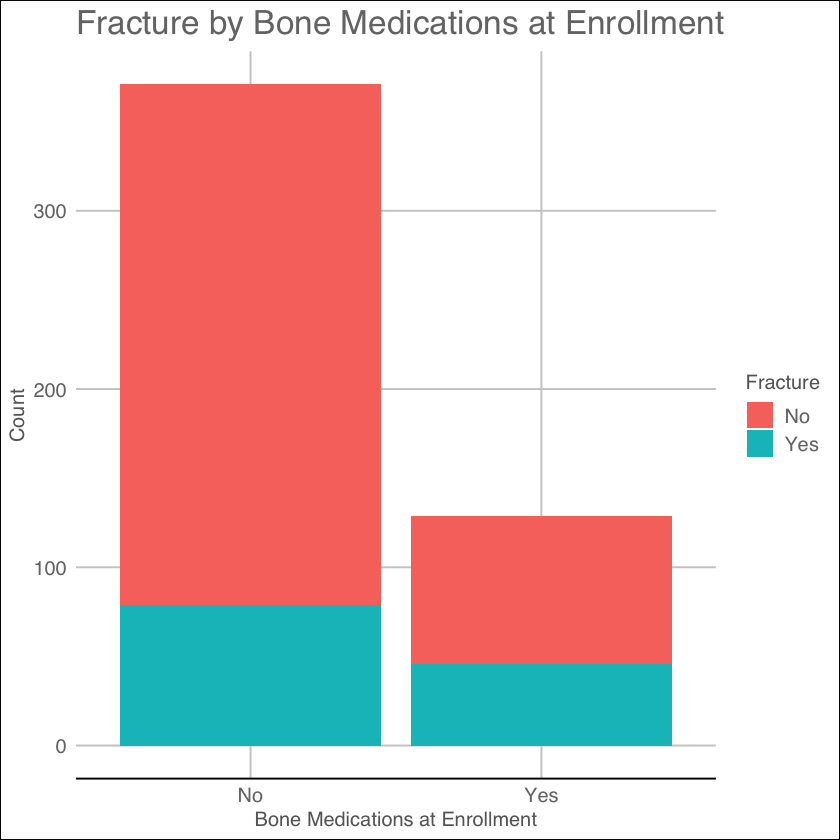

In [21]:
summary(factor(bone$bonemed))

# Fracture by bonemed
bone %>%
    ggplot(aes(x = bonemed, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(
        title = "Fracture by Bone Medications at Enrollment",
        x = "Bone Medications at Enrollment",
        y = "Count",
        fill = "Fracture"
    )

# Table of fracture prevalence by bonemed
bone %>%
    group_by(bonemed, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Bone Medications at Enrollment` = bonemed) %>%
    kable("html", caption = "Fracture by Bone Medications at Enrollment") %>%
    kable_styling("striped", full_width = F)

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$bonemed)

# Checking this method for fun. Same result as Fisher, harder syntax
# library(epitools)
# epitab(bone$bonemed, bone$fracture, method = "oddsratio", oddsratio = "fisher", pvalue = "fisher.exact")

Bone medications at enrollment appears to be a strongly associated with fractures. The odds of fracture are greater by 2x for those who are taking bone medications, and the difference is statistically significant (p < 0.05 from Fisher's exact test).

**Bone Medications at Follow-up:**

No Yes 
361 139

`summarise()` has grouped output by 'bonemed_fu'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Bone Medications at Follow-up</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Bone Medications at Follow-up </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.801 </td>
   <td style="text-align:right;"> 0.199 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.619 </td>
   <td style="text-align:right;"> 0.381 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$bonemed_fu
p-value = 4.787e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.570473 3.877015
sample estimates:
odds ratio 
   2.46857 


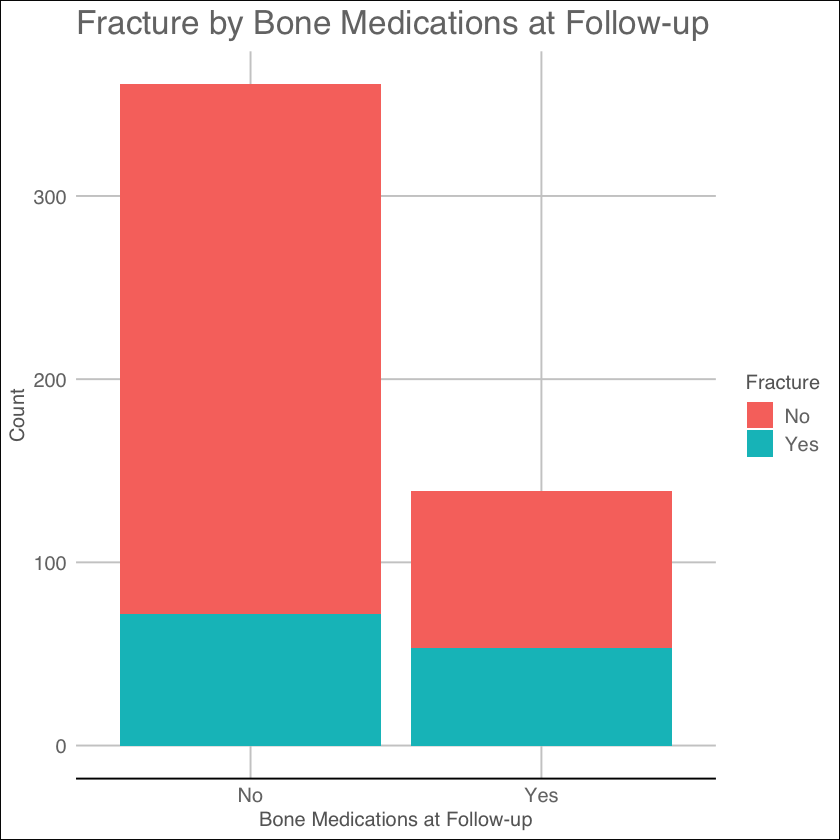

In [22]:
summary(factor(bone$bonemed_fu))

# Fracture by bonemed_fu
bone %>%
    ggplot(aes(x = bonemed_fu, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(
        title = "Fracture by Bone Medications at Follow-up",
        x = "Bone Medications at Follow-up",
        y = "Count",
        fill = "Fracture"
    )

# Table of fracture prevalence by bonemed_fu
bone %>%
    group_by(bonemed_fu, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Bone Medications at Follow-up` = bonemed_fu) %>%
    kable("html", caption = "Fracture by Bone Medications at Follow-up") %>%
    kable_styling("striped", full_width = F)

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$bonemed_fu)

Bone medications at follow-up appears to be a strongly associated with fractures. The odds of fracture are greater by 2.4x for those who are taking bone medications, and the difference is statistically significant (p < 0.0001 from Fisher's exact test). We expect this to be an even stronger predictor than bone medications at enrollment.

**Bone Medications at both Enrollment and Follow-up:**

No Yes 
382 118

`summarise()` has grouped output by 'bonetreat'. You can override using the
`.groups` argument.


<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Fracture by Bone Medications at both Enrollment and Follow-up</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> Bone Medications at both Enrollment and Follow-up </th>
   <th style="text-align:right;"> No </th>
   <th style="text-align:right;"> Yes </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 0.777 </td>
   <td style="text-align:right;"> 0.223 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 0.661 </td>
   <td style="text-align:right;"> 0.339 </td>
  </tr>
</tbody>
</table>


	Fisher's Exact Test for Count Data

data:  bone$fracture and bone$bonetreat
p-value = 0.01466
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.106815 2.871974
sample estimates:
odds ratio 
  1.789657 


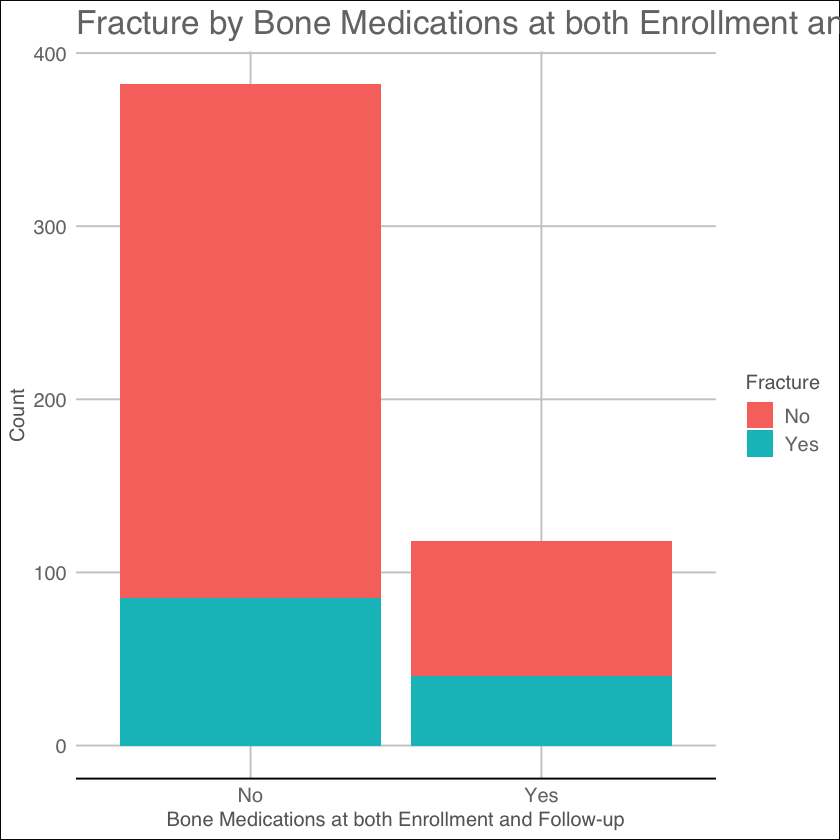

In [23]:
summary(factor(bone$bonetreat))

# Fracture by bonetreat
bone %>%
    ggplot(aes(x = bonetreat, fill = fracture)) +
    geom_bar() +
    theme_gdocs() +
    labs(
        title = "Fracture by Bone Medications at both Enrollment and Follow-up",
        x = "Bone Medications at both Enrollment and Follow-up",
        y = "Count",
        fill = "Fracture"
    )

# Table of fracture prevalence by bonetreat
bone %>%
    group_by(bonetreat, fracture) %>%
    summarise(Count = n()) %>%
    pivot_wider(names_from = fracture, values_from = Count) %>%
    mutate(Total = `No` + `Yes`) %>%
    mutate(`No` = round(`No` / Total, 3)) %>%
    mutate(`Yes` = round(`Yes` / Total, 3)) %>%
    select(-Total) %>%
    rename(`Bone Medications at both Enrollment and Follow-up` = bonetreat) %>%
    kable("html", caption = "Fracture by Bone Medications at both Enrollment and Follow-up") %>%
    kable_styling("striped", full_width = F)

# Fisher's exact test for difference
fisher.test(bone$fracture, bone$bonetreat)

Bone medication at both enrollment and follow-up is associated with a higher prevalence of fractures. The odds of fracture are greater by 1.79x for those who are taking bone medications, and the difference is statistically significant (p < 0.02 from Fisher's exact test).

**Visualize scatterplot matrices by fracture between numeric variables:**

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


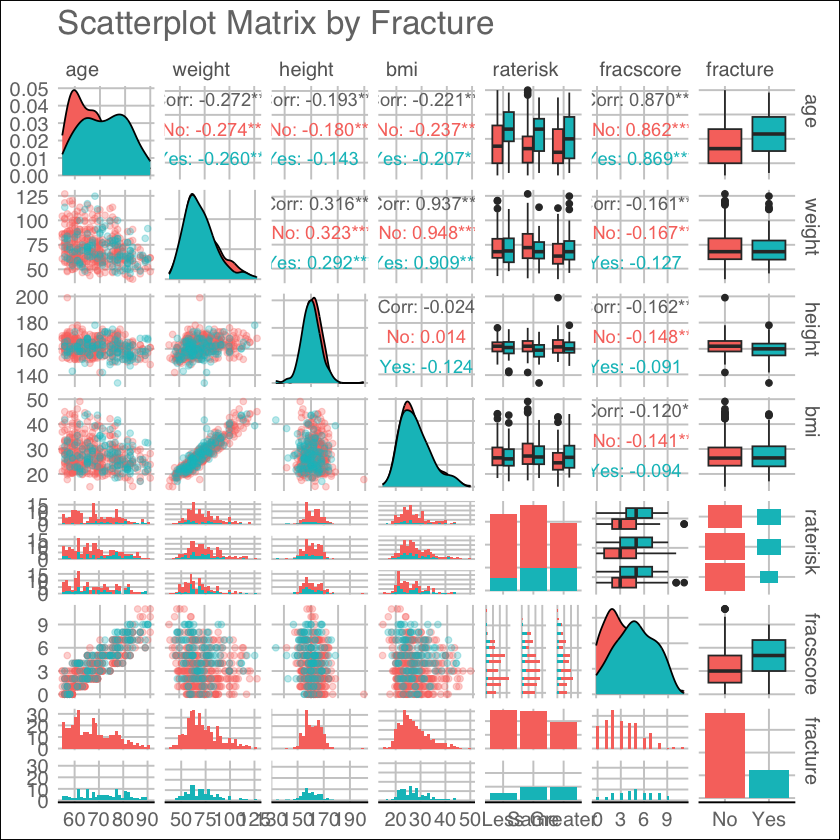

In [24]:
library(GGally)
# Scatterplot matrix by fracture
bone %>%
    select(c(5, 6, 7, 8, 13, 14, 15)) %>%
    ggpairs(columns = 1:ncol(.),
        mapping = aes(color = fracture),
        lower = list(continuous = wrap("points", alpha = 0.3))) +
    theme_gdocs() +
    labs(title = "Scatterplot Matrix by Fracture", color = "Fracture")

There is some multicollinearity between the numeric variables. There previously discussed relationships between the variables and fracture rate hold, but there doesn't appear to be obvious separation between the groups. Fracture score (composite) has the most correlation with age at 0.87. We will still include this variable unless it causes problems.

**Correlations between variables:**

corrplot 0.92 loaded



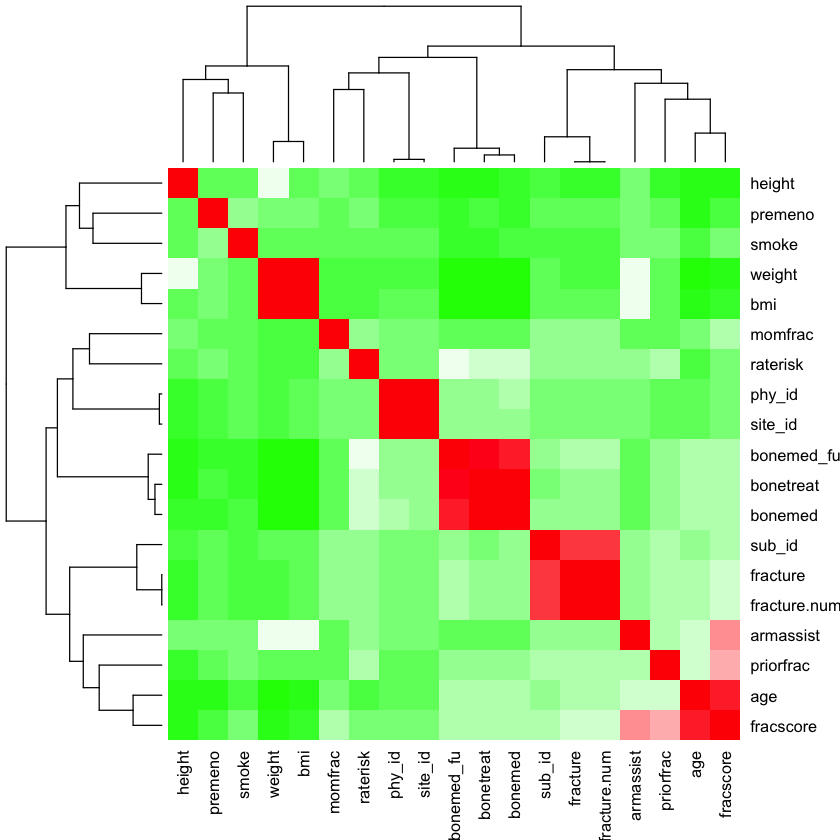

In [25]:
mydata <- bone

# Convert the categorical variables to factors
mydata[sapply(mydata, is.character)] <- lapply(mydata[sapply(mydata, is.character)], as.factor)

# Convert factors to numeric
mydata[sapply(mydata, is.factor)] <- lapply(mydata[sapply(mydata, is.factor)], as.numeric)

# Calculate the correlation matrix
correlation_matrix <- cor(mydata)

library(corrplot)

palette = colorRampPalette(c("green", "white", "red")) (20)
heatmap(x = correlation_matrix, col = palette, symm = TRUE)

There is some multicollinearity between related variables. For example between weight and BMI, and among subject id, site id, and physician id. The bone medication variables also have a high correlation with each other. Composite fracture score is correlated with age, prior fracture and arm assist. These were all predicted to be important variables and the correlation may cause issues with variance inflation.

## Objective 1

The first objective is to build a logistic regression for interpretation. Although the objective of this section is interpretation, we will split the dataset into training and validation sets to evaluate the model. These initial results will serve to compare the increased performance of the more complex models. 

In [26]:
# Split into train / test using caret
set.seed(123)
trainIndex <- createDataPartition(bone$fracture, p = .7, list = FALSE)
train <- bone[trainIndex, ]
test <- bone[-trainIndex, ]

### Logistic Regression Model for Interpretable Results
For the interpretable model, we will fit a logistic regression model with all of the variables. We will perform feature selection to remove insignificant variables, noting whether the significance levels correspond with the EDA.

In [27]:
# Logistic regression model all predictors
bone_logit <- glm(fracture ~ ., data = train, family = "binomial")
summary(bone_logit)

library(car)
vif(bone_logit)

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = fracture ~ ., family = "binomial", data = train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)     -2.657e+01  2.346e+06   0.000    1.000
sub_id           3.569e-16  2.045e+02   0.000    1.000
site_id          7.793e-13  4.668e+04   0.000    1.000
phy_id          -3.624e-15  7.157e+02   0.000    1.000
priorfracYes    -3.703e-12  7.552e+04   0.000    1.000
age              8.034e-15  1.014e+04   0.000    1.000
weight           2.550e-13  1.671e+04   0.000    1.000
height          -1.951e-13  1.478e+04   0.000    1.000
bmi             -1.224e-12  4.456e+04   0.000    1.000
premenoYes       3.792e-12  5.086e+04   0.000    1.000
momfracYes      -2.193e-12  7.530e+04   0.000    1.000
armassistYes     1.666e-12  1.088e+05   0.000    1.000
smokeYes        -2.286e-13  9.863e+04   0.000    1.000
rateriskSame    -6.434e-13  4.694e+04   0.000    1.000
rateriskGreater -3.518e-13  5.507e+04   0.000    1.000
fracscore        1.424e-13  4.998e+

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




,GVIF,Df,GVIF^(1/(2*Df))
sub_id,2.385293,1,1.544439
site_id,20.293870,1,4.504872
phy_id,20.264439,1,4.501604
priorfrac,2.702715,1,1.643994
age,22.870082,1,4.782267
weight,201.026472,1,14.178380
height,24.115846,1,4.910789
bmi,177.912345,1,13.338379
premeno,1.105563,1,1.051458
momfrac,2.042801,1,1.429266


Including all of the predictors results in a model that does not converge. This is likely due to the structure of the dataset which makes sub_id and, to a lesser extent, site_id and phy_id perfect predictors of fracture. This is further demonstrated by some of the very high variance inflation factors in this model.

Next, we fit a logistic regression with the offending predictors removed:

In [28]:
# Logistic regression model useful predictors
bone_logit <- glm(fracture ~ . -fracture.num -sub_id -site_id -phy_id, data = train, family = "binomial")
summary(bone_logit)

library(car)
#(bone_logit)


Call:
glm(formula = fracture ~ . - fracture.num - sub_id - site_id - 
    phy_id, family = "binomial", data = train)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -35.99677   16.16707  -2.227  0.02598 * 
priorfracYes      0.78136    0.50589   1.545  0.12246   
age               0.03050    0.07058   0.432  0.66570   
weight           -0.23595    0.11803  -1.999  0.04560 * 
height            0.19060    0.10240   1.861  0.06269 . 
bmi               0.64398    0.31160   2.067  0.03877 * 
premenoYes        0.16339    0.35704   0.458  0.64723   
momfracYes        0.64632    0.50215   1.287  0.19806   
armassistYes      0.02265    0.76122   0.030  0.97626   
smokeYes         -0.28240    0.72646  -0.389  0.69747   
rateriskSame      0.50019    0.35366   1.414  0.15727   
rateriskGreater   0.73777    0.39191   1.882  0.05977 . 
fracscore         0.06095    0.35140   0.173  0.86230   
bonemedYes        2.00515    0.77236   2.596  0.00943 **
bonemed_fuYe

This model appears to be more stable. As expected, BMI and fracscore appear to be causing some variance inflation issues due to multicollinearity. We will remove these variables and refit the model:

In [29]:
# Logistic regression model with useful predictors
bone_logit <- glm(fracture ~ . - fracture.num - sub_id - site_id - phy_id - bmi - fracscore,
    data = train, family = "binomial"
)
summary(bone_logit)

library(car)
#vif(bone_logit)


Call:
glm(formula = fracture ~ . - fracture.num - sub_id - site_id - 
    phy_id - bmi - fracscore, family = "binomial", data = train)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -2.543797   4.119675  -0.617  0.53692   
priorfracYes     0.827962   0.319981   2.588  0.00967 **
age              0.041162   0.018119   2.272  0.02310 * 
weight           0.007568   0.010470   0.723  0.46980   
height          -0.018499   0.024268  -0.762  0.44589   
premenoYes       0.174294   0.355327   0.491  0.62377   
momfracYes       0.719337   0.351618   2.046  0.04078 * 
armassistYes     0.124069   0.319554   0.388  0.69783   
smokeYes        -0.278345   0.643426  -0.433  0.66531   
rateriskSame     0.460120   0.352219   1.306  0.19144   
rateriskGreater  0.706537   0.389731   1.813  0.06985 . 
bonemedYes       1.974352   0.765409   2.579  0.00990 **
bonemed_fuYes    1.421071   0.650332   2.185  0.02888 * 
bonetreatYes    -3.039918   1.023637  -2.970  0.002

This model appears to be stable. We will use this model for interpretation. 

In [30]:
anova(bone_logit, test = "Chisq") %>% kable() %>% kable_styling("striped", full_width = F)

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> Df </th>
   <th style="text-align:right;"> Deviance </th>
   <th style="text-align:right;"> Resid. Df </th>
   <th style="text-align:right;"> Resid. Dev </th>
   <th style="text-align:right;"> Pr(&gt;Chi) </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> NULL </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> 350 </td>
   <td style="text-align:right;"> 395.3076 </td>
   <td style="text-align:right;"> NA </td>
  </tr>
  <tr>
   <td style="text-align:left;"> priorfrac </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 22.6117687 </td>
   <td style="text-align:right;"> 349 </td>
   <td style="text-align:right;"> 372.6959 </td>
   <td style="text-align:right;"> 0.000002

The following variables are statistically significant at the 0.05 level: age, priorfrac, momfrac, and bonetreat. The variable raterisk is significant at 0.10. This is consistent with the EDA with the exception that the variable armassist is not significant. We will keep all of the variables in the model for interpretation.

#### Interpretation

In [31]:
# Odds ratios
exp(cbind(OR = coef(bone_logit), confint(bone_logit))) %>%
    kable("html", caption = "Odds Ratios", digits = 3) %>%
    kable_styling("striped", full_width = F)

Waiting for profiling to be done...



<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Odds Ratios</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> OR </th>
   <th style="text-align:right;"> 2.5 % </th>
   <th style="text-align:right;"> 97.5 % </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> (Intercept) </td>
   <td style="text-align:right;"> 0.079 </td>
   <td style="text-align:right;"> 0.000 </td>
   <td style="text-align:right;"> 274.693 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> priorfracYes </td>
   <td style="text-align:right;"> 2.289 </td>
   <td style="text-align:right;"> 1.219 </td>
   <td style="text-align:right;"> 4.287 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> age </td>
   <td style="text-align:right;"> 1.042 </td>
   <td style="text-align:right;"> 1.006 </td>
   <td style="text-align:right;"> 1.080 </td>
  </tr>
  <tr>
   <td style="text-align:left

Examples of interpretation:  
- Holding all other variables constant, the odds of fracture increase by 4% for each year increase in age. We can be 95% confident that the true increase in odds ratio is between 0.6% and 8%. This increase is both statistically (p < 0.05) and practically significant (5 year increase in age corresponds with a 22% increase in the odds of fracture).  
- Holding all other variables constant, the odds of fracture increase by 4.1x for patients taking bone medications at follow-up. We can be 95% confident that the true increase in odds ratio is between 1.2x and 15.6x. This increase is both statistically (p < 0.05) and practically significant.

The following effects plots show how changes in predictors affect the probability of fracture:

Use the command
    lattice::trellis.par.set(effectsTheme())
  to customize lattice options for effects plots.
See ?effectsTheme for details.



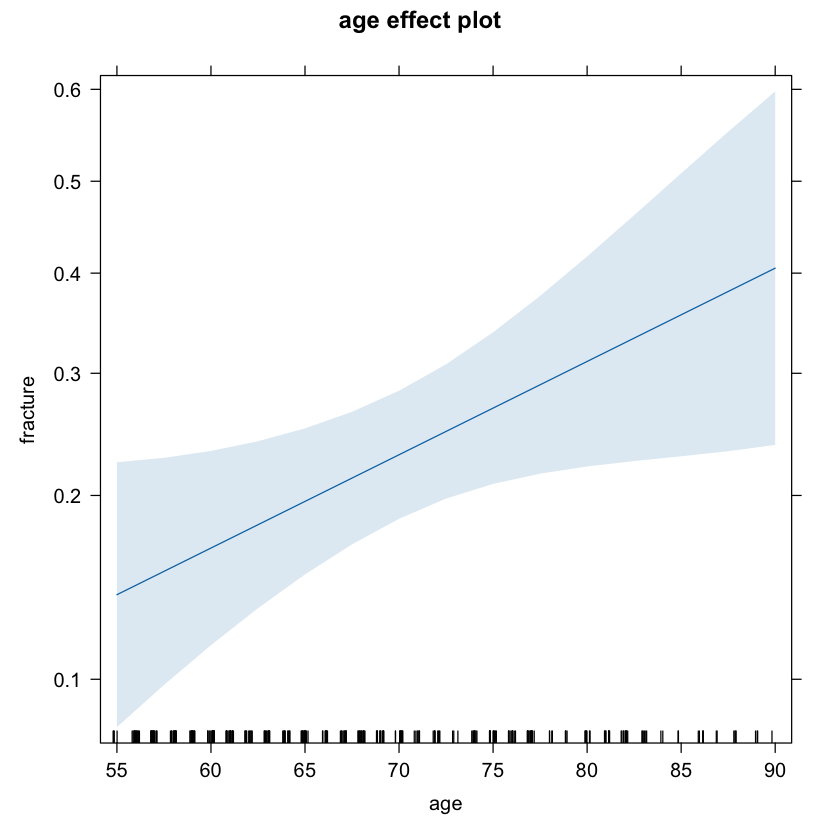

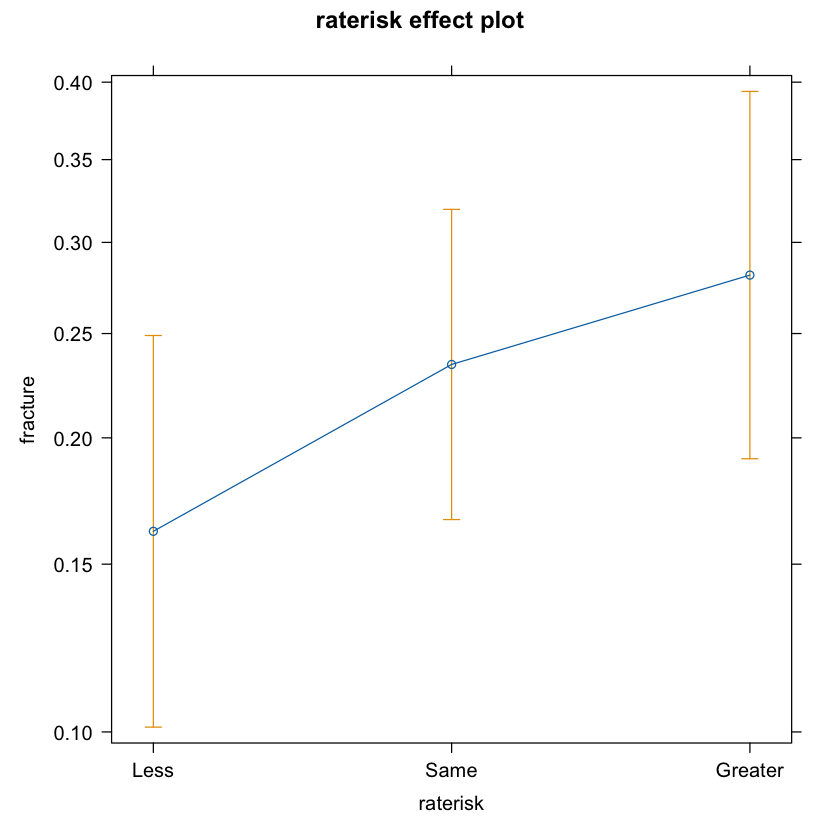

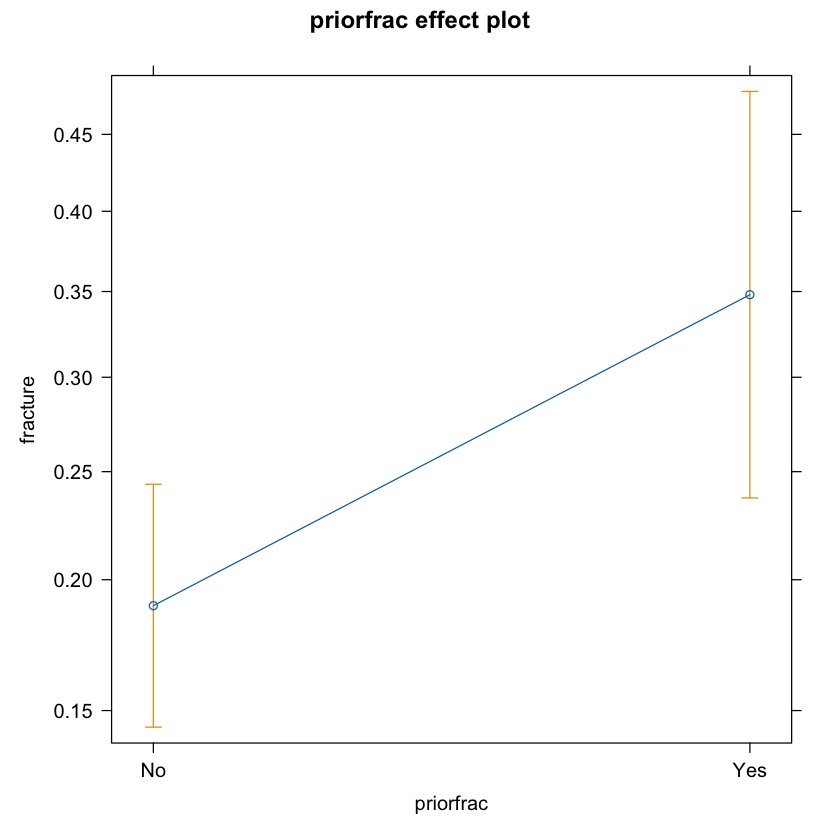

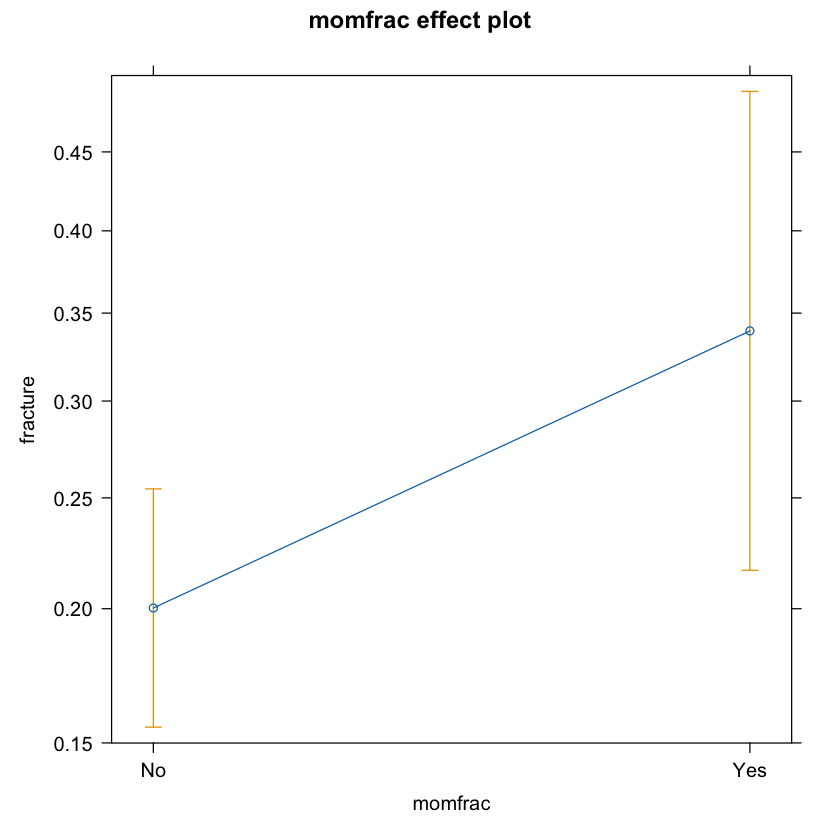

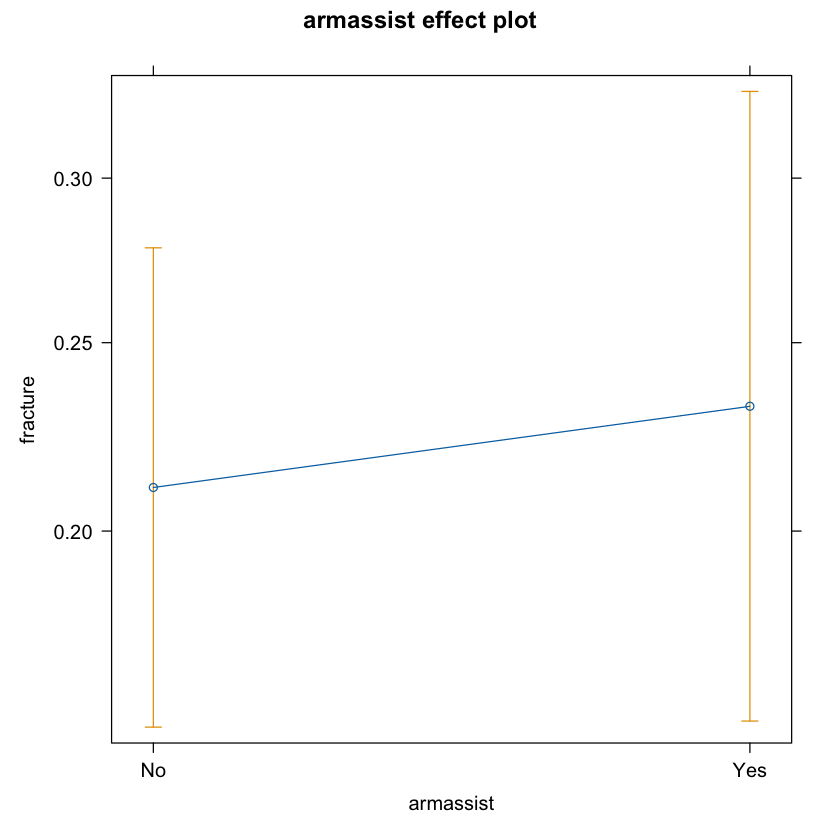

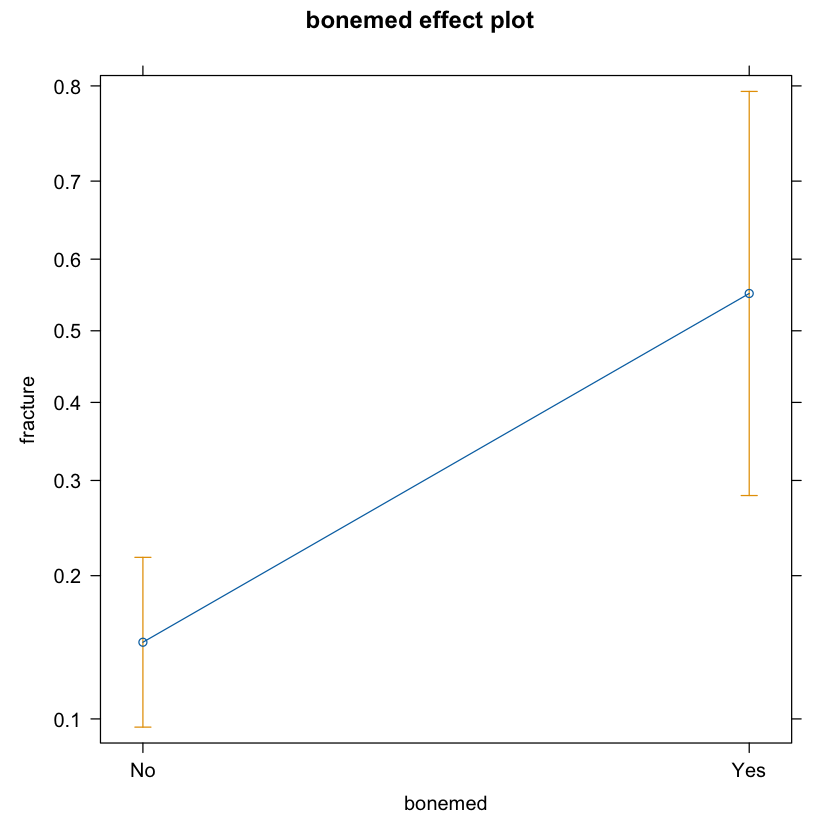

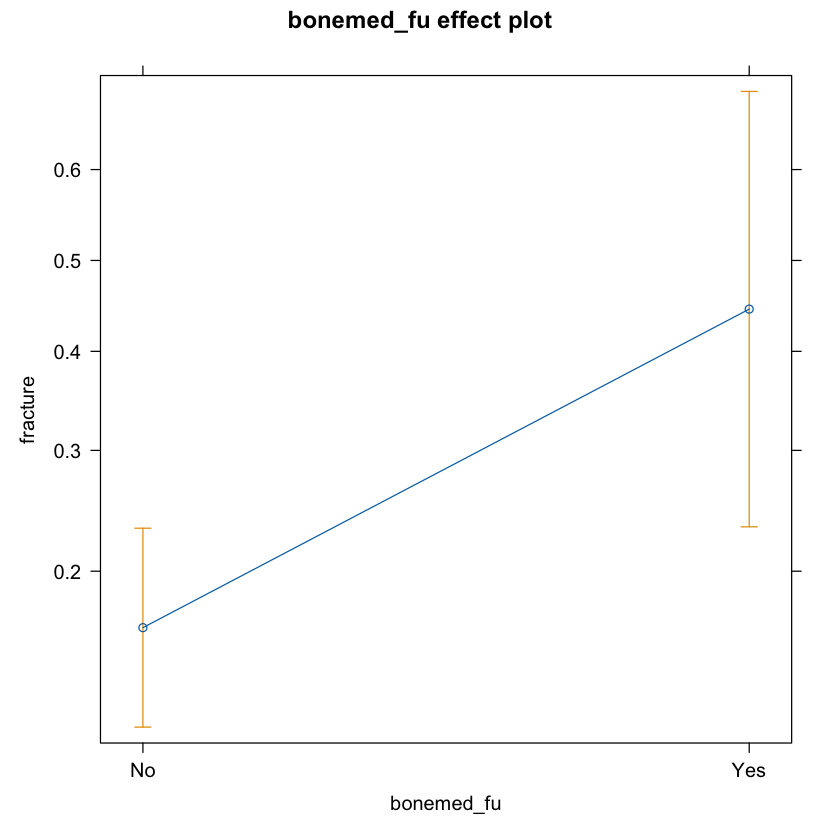

#refugeeswelcome


Attaching package: ‘sjmisc’


The following object is masked from ‘package:purrr’:

    is_empty


The following object is masked from ‘package:tidyr’:

    replace_na


The following object is masked from ‘package:tibble’:

    add_case


Data were 'prettified'. Consider using `terms="age [all]"` to get smooth
  plots.



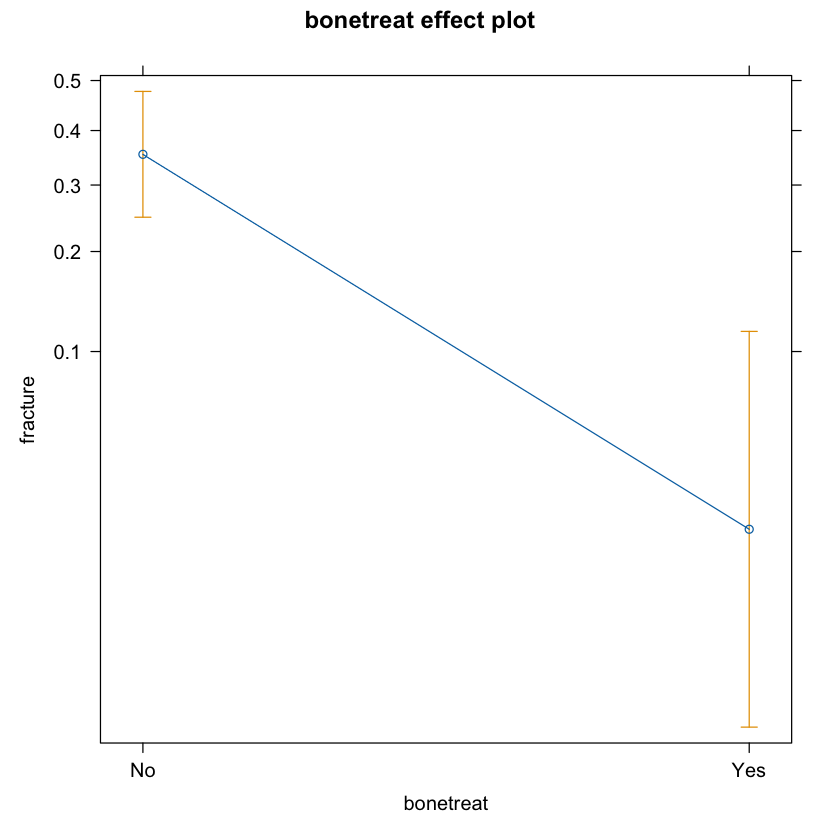

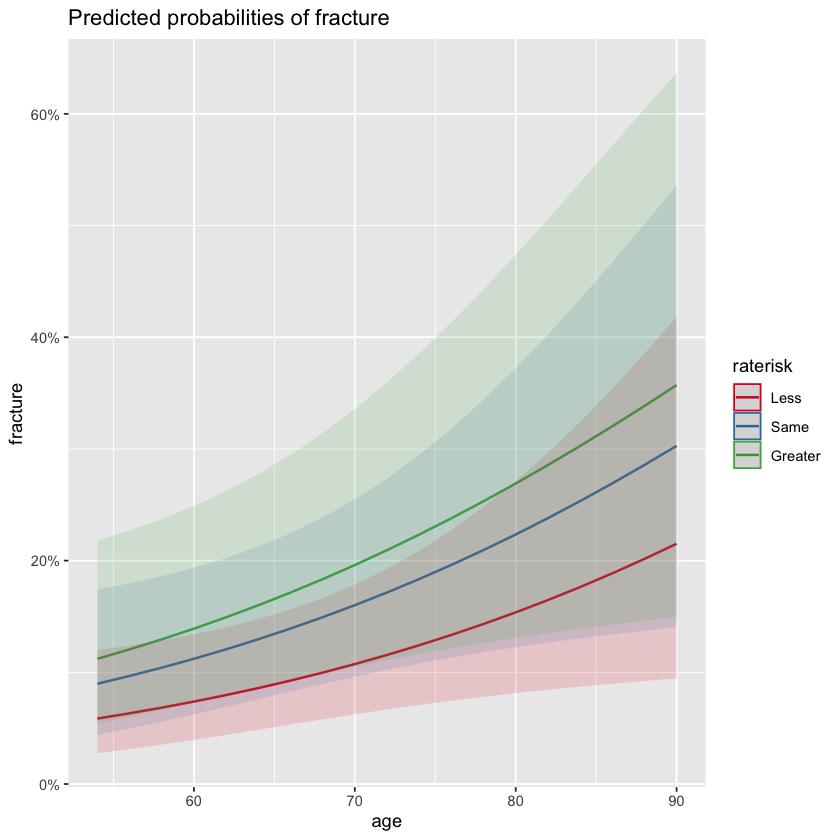

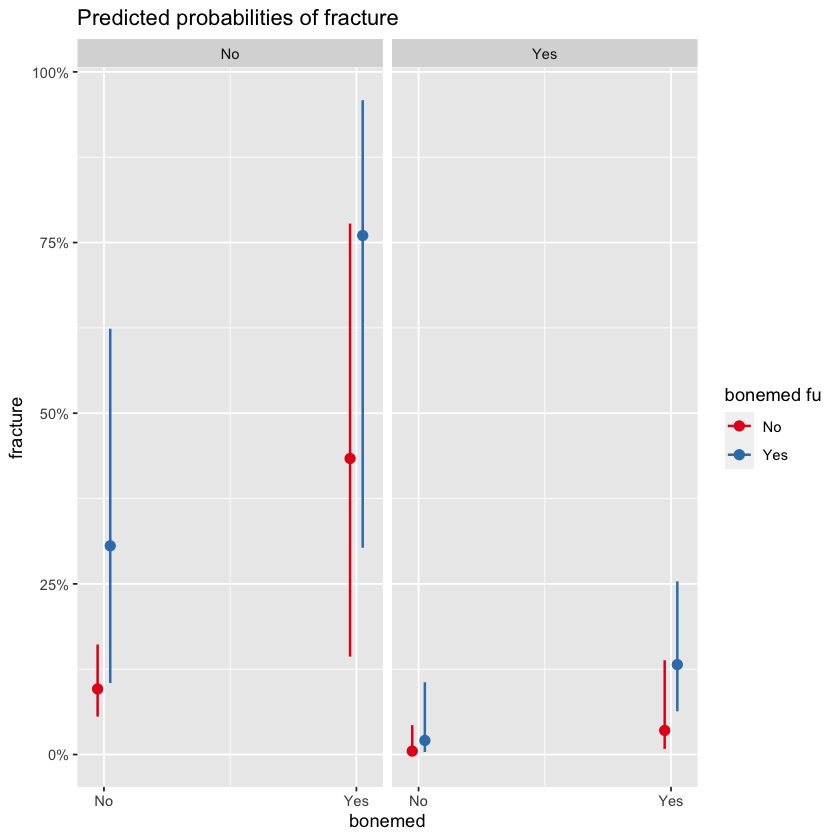

In [32]:
# New Way
library(effects)
plot(effect("age", bone_logit))
plot(effect("raterisk", bone_logit))
plot(effect("priorfrac", bone_logit))
plot(effect("momfrac", bone_logit))
plot(effect("armassist", bone_logit))
plot(effect("bonemed", bone_logit))
plot(effect("bonemed_fu", bone_logit))
plot(effect("bonetreat", bone_logit))


# Prelive Way
library(sjPlot)
library(sjmisc)
plot_model(bone_logit,type="pred",terms=c("age","raterisk"))
plot_model(bone_logit,type="pred",terms=c("bonemed","bonemed_fu","bonetreat"))

#### Error Metrics

The error metrics below pertain to how the logistic regression model performs on the test data.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting direction: controls < cases



Area under the curve: 0.6935

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  89  17
       Yes 23  20
                                          
               Accuracy : 0.7315          
                 95% CI : (0.6529, 0.8008)
    No Information Rate : 0.7517          
    P-Value [Acc > NIR] : 0.7493          
                                          
                  Kappa : 0.3179          
                                          
 Mcnemar's Test P-Value : 0.4292          
                                          
            Sensitivity : 0.5405          
            Specificity : 0.7946          
         Pos Pred Value : 0.4651          
         Neg Pred Value : 0.8396          
             Prevalence : 0.2483          
         Detection Rate : 0.1342          
   Detection Prevalence : 0.2886          
      Balanced Accuracy : 0.6676          
                                          
       'Positive' Class : Yes             
                                 

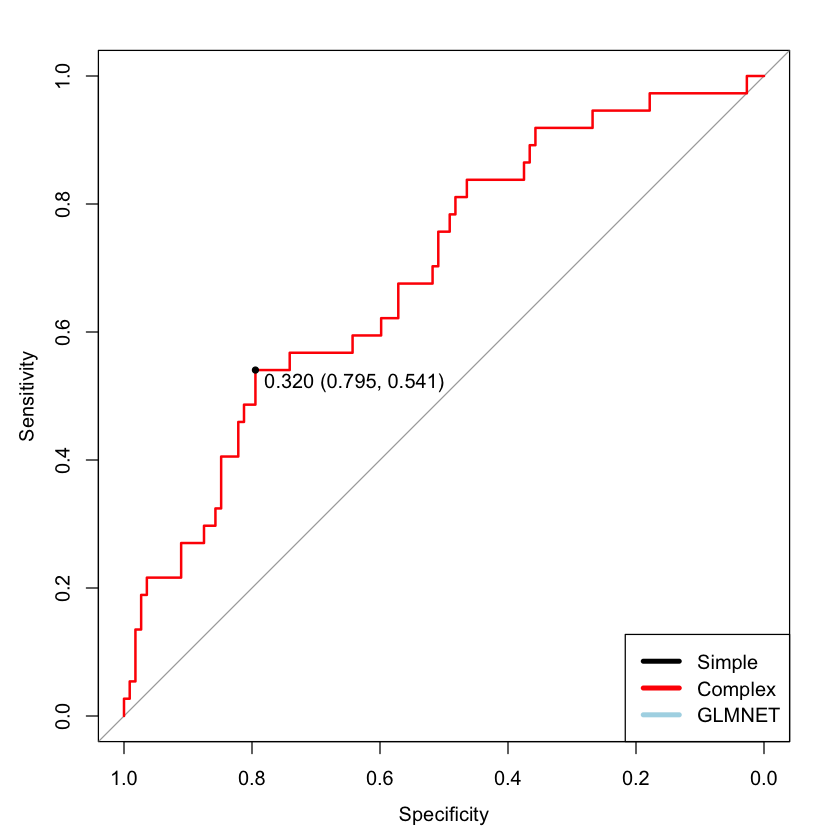

In [33]:
library(pROC)
# Predicting probabilities on the test data
logit.probs <- predict(bone_logit, test, type = "response")
logit.roc <- roc(response = test$fracture, predictor = logit.probs, levels = c("No", "Yes"))


plot(logit.roc,print.thres="best",col="red")
# plot(glmnet.roc,add=T,col="lightblue")
legend("bottomright",
       legend=c("Simple", "Complex","GLMNET"),
       col=c("black", "red","lightblue"),
       lwd=4, cex =1, xpd = TRUE, horiz = FALSE)
auc(logit.roc)

# Confusion Matrix
logit.probs <- predict(bone_logit, test, type = "response")
logit.pred <- ifelse(logit.probs > 0.320, "Yes", "No")
logit.conf <- confusionMatrix(factor(logit.pred), factor(test$fracture), positive = "Yes")
logit.conf

The logistic regression model has an AUC of 0.69 with the threshold set at the ideal level 0.32. The confusion matrix indicates that the model has a sensitivity of 0.54 and a specificity of 0.79. The model is better at predicting non-fractures than fractures. We expect that more complicated models will perform much better at prediction.

## Objective 2

For the second objective, we are attempting find a model with higher predictive performance and without concern for interpretability. To accomplish this, we will introduce complexity into the logistic regression model by adding polynomial and interaction terms and then perform feature selection using the glmnet package. We will also fit a LDA / QDA model and a Nonparametric model and compare the results. 

The metric we will use to compare the models is the area under the reciever-operator curve (AUROC). Because this is an observational study and we don't have any specific performance guidelines, there is no clear cutoff for sensitivity and specificity. AUROC represents the oberall predictive power of the model as a combination of sensitivity and specificity and thus will be used to select the best predictive model. 

### Complex Logistic Regression Model

To capture any complexity that the interpretable logistic regression may have missed, we will add two types of variables. The numeric variables will be transformed into polynomial terms up to degree three. Then, all variables in the model will be interacted with each other. There is some evidence of interaction in the data, such as this example of age and raterisk:

`geom_smooth()` using formula = 'y ~ x'


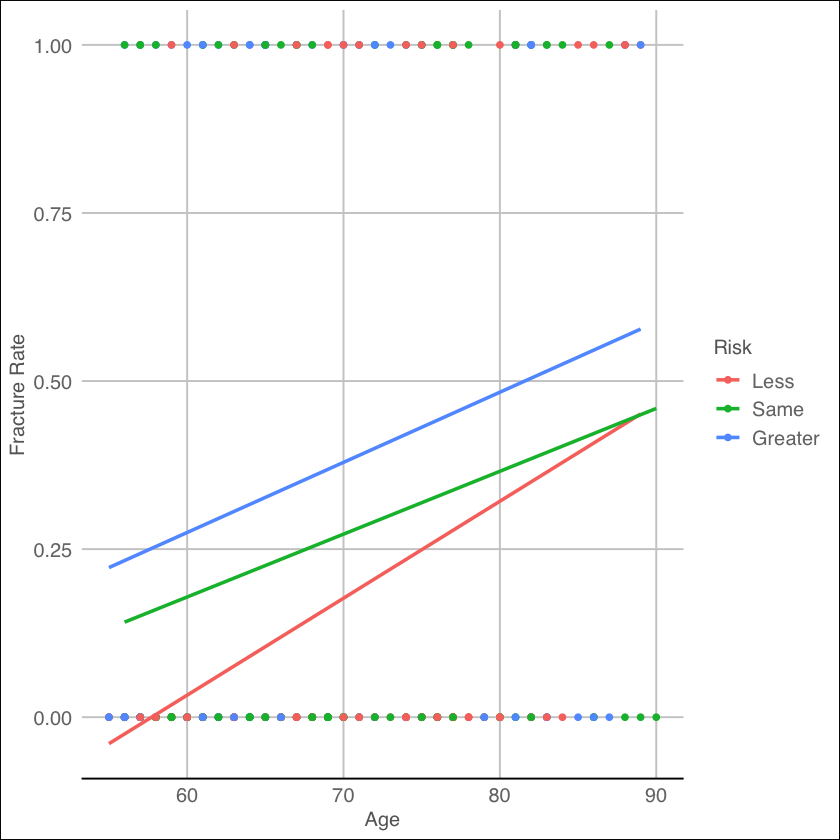

In [34]:
#Visualize mean fracture rate by age and raterisk
ggplot(train, aes(x = age, y = fracture.num, color = raterisk)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(x = "Age", y = "Fracture Rate", color = "Risk") +
    theme_gdocs()

To account for this, we will simply add all possible interaction terms and then perform feature selection using glmnet. 

fracture ~ poly(age, 3) + poly(weight, 3) + poly(height, 3) + 
    poly(bmi, 3) + poly(fracscore, 3) + priorfrac:age + priorfrac:weight + 
    priorfrac:height + priorfrac:bmi + priorfrac:premeno + priorfrac:momfrac + 
    priorfrac:armassist + priorfrac:smoke + priorfrac:raterisk + 
    priorfrac:fracscore + priorfrac:bonemed + priorfrac:bonemed_fu + 
    priorfrac:bonetreat + age:weight + age:height + age:bmi + 
    age:premeno + age:momfrac + age:armassist + age:smoke + age:raterisk + 
    age:fracscore + age:bonemed + age:bonemed_fu + age:bonetreat + 
    weight:height + weight:bmi + weight:premeno + weight:momfrac + 
    weight:armassist + weight:smoke + weight:raterisk + weight:fracscore + 
    weight:bonemed + weight:bonemed_fu + weight:bonetreat + height:bmi + 
    height:premeno + height:momfrac + height:armassist + height:smoke + 
    height:raterisk + height:fracscore + height:bonemed + height:bonemed_fu + 
    height:bonetreat + bmi:premeno + bmi:momfrac + bmi:armassist + 


Warning message:
“from glmnet C++ code (error code -91); Convergence for 91th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -86); Convergence for 86th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


glmnet 

351 samples
 14 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 280, 281, 281, 281, 281 
Resampling results across tuning parameters:

  alpha  lambda        logLoss    AUC        prAUC      Accuracy   Kappa     
  0.10   0.0002517636  0.9578117  0.6487398  0.6083914  0.7181087  0.15806425
  0.10   0.0025176356  0.6721001  0.6665398  0.6306358  0.7350503  0.20541926
  0.10   0.0251763560  0.5540170  0.6896566  0.6346748  0.7377062  0.19229555
  0.55   0.0002517636  0.9908692  0.6448682  0.6083189  0.7209658  0.16290411
  0.55   0.0025176356  0.6472304  0.6635144  0.6287970  0.7350101  0.18114035
  0.55   0.0251763560  0.5526769  0.6644619  0.6072282  0.7406439  0.14203053
  1.00   0.0002517636  1.1544814  0.6277218  0.5940189  0.7123944  0.16016255
  1.00   0.0025176356  0.6306857  0.6601725  0.6262662  0.7463984  0.20872680
  1.00   0.0251763560  0.5405747  0.6719953  0.6108930  0.7407646 

134 x 1 sparse Matrix of class "dgCMatrix"
                                         s1
(Intercept)                   -1.694411e+00
poly(age, 3)1                  .           
poly(age, 3)2                  1.135144e+00
poly(age, 3)3                  2.949949e+00
poly(weight, 3)1               .           
poly(weight, 3)2              -6.158068e+00
poly(weight, 3)3               3.206821e+00
poly(height, 3)1              -3.361492e+00
poly(height, 3)2               .           
poly(height, 3)3              -2.035043e+00
poly(bmi, 3)1                  3.751888e-02
poly(bmi, 3)2                  8.112392e-01
poly(bmi, 3)3                 -2.854427e+00
poly(fracscore, 3)1            1.439617e+00
poly(fracscore, 3)2           -2.244877e+00
poly(fracscore, 3)3           -3.243295e+00
priorfracNo:age                .           
priorfracYes:age               .           
priorfracNo:weight            -4.309180e-03
priorfracYes:weight            3.656712e-03
priorfracNo:height            -3.

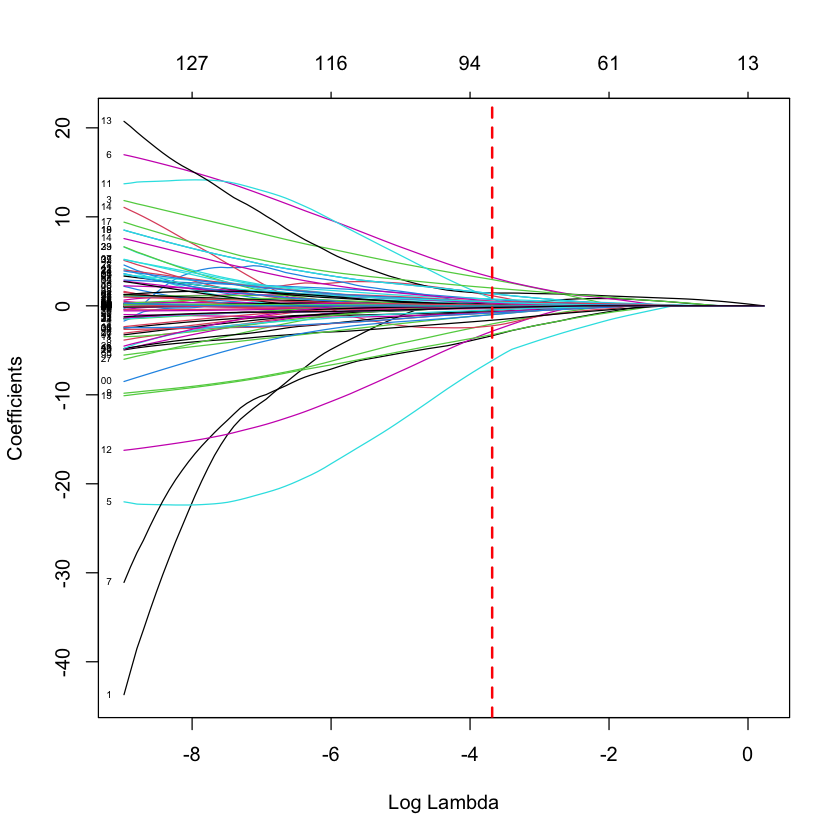

In [35]:
# Create formula

# Identify numeric columns
numeric_cols <- names(bone)[sapply(bone, is.numeric)] %>%
    setdiff(c("fracture", "fracture.num", "sub_id", "site_id", "phy_id"))

# Generate polynomial terms
poly_terms <- sapply(numeric_cols, function(x) paste0("poly(", x, ", 3)"))

# Generate interaction terms
all_terms <- names(bone) %>%
    setdiff(c("fracture", "fracture.num", "sub_id", "site_id", "phy_id"))
interaction_terms <- combn(all_terms, 2, function(x) paste(x, collapse = ":"), simplify = TRUE)

# Combine everything for the formula
formula_terms <- c(poly_terms, interaction_terms)
formula_string <- paste("fracture ~", paste(formula_terms, collapse = " + "))

# Convert to a formula object
final_formula <- as.formula(formula_string)

print(final_formula)

# Complex Logistic regression model
library(caret)
fitControl <- trainControl(
  method = "repeatedcv",
  number = 5,
  repeats = 1,
  classProbs = TRUE,
  summaryFunction = multiClassSummary
)
set.seed(1234)
# GLMNET
complex.fit <- train(final_formula,
    data = train,
    method = "glmnet",
    trControl = fitControl,
    metric = "AUC"
)
print(complex.fit)
coef(complex.fit$finalModel, complex.fit$finalModel$lambdaOpt)

#Plot lambda Opt
plot(complex.fit$finalModel, xvar="lambda", label=TRUE)
abline(v=log(complex.fit$finalModel$lambdaOpt), col="red", lwd=2, lty=2)

Many of the polynomial and interaction terms were removed by glmnet. The final model still contains too many variables to be interpretable, and is much more complex than the previous logistic regression model.

#### Error Metrics

The error metrics below pertain to how the complex logistic regression model performs on the test data.

Setting direction: controls < cases



Area under the curve: 0.6957

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  82  19
       Yes 30  18
                                          
               Accuracy : 0.6711          
                 95% CI : (0.5895, 0.7458)
    No Information Rate : 0.7517          
    P-Value [Acc > NIR] : 0.9895          
                                          
                  Kappa : 0.1988          
                                          
 Mcnemar's Test P-Value : 0.1531          
                                          
            Sensitivity : 0.4865          
            Specificity : 0.7321          
         Pos Pred Value : 0.3750          
         Neg Pred Value : 0.8119          
             Prevalence : 0.2483          
         Detection Rate : 0.1208          
   Detection Prevalence : 0.3221          
      Balanced Accuracy : 0.6093          
                                          
       'Positive' Class : Yes             
                                 

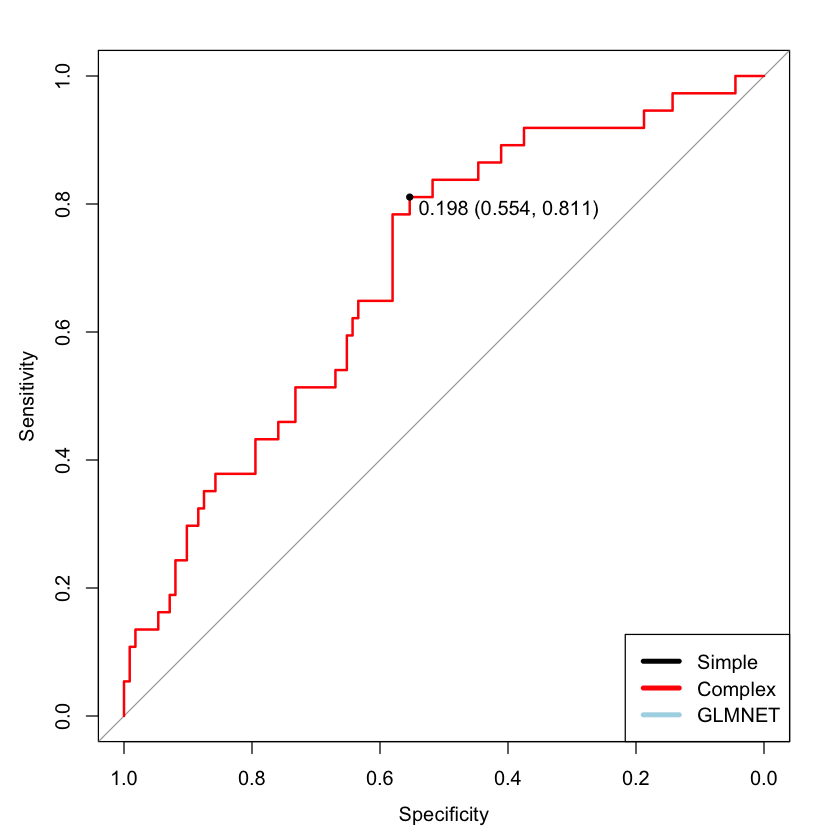

In [36]:
library(pROC)
# Predicting probabilities on the test data
complex.probs <- predict(complex.fit, test, type = "prob")$Yes
complex.roc <- roc(response = test$fracture, predictor = complex.probs, levels = c("No", "Yes"))


plot(complex.roc,print.thres="best",col="red")
# plot(glmnet.roc,add=T,col="lightblue")
legend("bottomright",
       legend=c("Simple", "Complex","GLMNET"),
       col=c("black", "red","lightblue"),
       lwd=4, cex =1, xpd = TRUE, horiz = FALSE)
auc(complex.roc)

# Confusion Matrix
# complex.probs <- predict(complex.fit, test, type = "raw") #Not needed for caret
complex.pred <- ifelse(complex.probs > 0.320, "Yes", "No")
complex.conf <- confusionMatrix(factor(complex.pred), factor(test$fracture), positive = "Yes")
complex.conf

The complex logistic regression model has an AUC of 0.69 with the threshold set at the ideal level 0.18. The confusion matrix indicates that the model has a sensitivity of 0.48 and a specificity of 0.73. In respect to the metrics we've chosen, the complex model performs the same or worse than the interpretable model. This indicates that either the data is not complex enough to warrant a more complicated model, or that the model is overfitting the data.

### LDA / QDA

,sub_id,site_id,phy_id,priorfrac,age,weight,height,bmi,premeno,momfrac,armassist,smoke,raterisk,fracscore,fracture,bonemed,bonemed_fu,bonetreat
,<int>,<int>,<int>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,1,1,14,No,62,70.3,158,28.16055,No,No,No,No,Same,1,No,No,No,No
2,2,4,284,No,65,87.1,160,34.02344,No,No,No,No,Same,2,No,No,No,No
3,3,6,305,Yes,88,50.8,157,20.60936,No,Yes,Yes,No,Less,11,No,No,No,No
4,4,6,309,No,82,62.1,160,24.25781,No,No,No,No,Less,5,No,No,No,No
5,5,1,37,No,61,68.0,152,29.43213,No,No,No,No,Same,1,No,No,No,No
6,6,5,299,Yes,67,68.0,161,26.23356,No,No,No,Yes,Same,4,No,No,No,No


[1] "sub_id"     "site_id"    "phy_id"     "priorfrac"  "age"       
 [6] "weight"     "height"     "bmi"        "premeno"    "momfrac"   
[11] "armassist"  "smoke"      "raterisk"   "fracscore"  "fracture"  
[16] "bonemed"    "bonemed_fu" "bonetreat"

[1] "sub_id"     "site_id"    "phy_id"     "priorfrac"  "age"       
 [6] "weight"     "height"     "bmi"        "premeno"    "momfrac"   
[11] "armassist"  "smoke"      "raterisk"   "fracscore"  "fracture"  
[16] "bonemed"    "bonemed_fu" "bonetreat"

[1] "priorfrac"  "age"        "weight"     "height"     "premeno"   
 [6] "momfrac"    "armassist"  "smoke"      "raterisk"   "fracscore" 
[11] "fracture"   "bonemed"    "bonemed_fu" "bonetreat"

Warning message in confusionMatrix.default(data = lda.preds, reference = test$fracture, :
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(data = qda.preds, reference = test$fracture, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  77  13
       Yes 35  24
                                         
               Accuracy : 0.6779         
                 95% CI : (0.5965, 0.752)
    No Information Rate : 0.7517         
    P-Value [Acc > NIR] : 0.983414       
                                         
                  Kappa : 0.2803         
                                         
 Mcnemar's Test P-Value : 0.002437       
                                         
            Sensitivity : 0.6875         
            Specificity : 0.6486         
         Pos Pred Value : 0.8556         
         Neg Pred Value : 0.4068         
              Precision : 0.8556         
                 Recall : 0.6875         
                     F1 : 0.7624         
             Prevalence : 0.7517         
         Detection Rate : 0.5168         
   Detection Prevalence : 0.6040         
      Balanced Accuracy : 0.6681         
           

Setting direction: controls > cases

Setting direction: controls > cases



Area under the curve: 0.6889

Area under the curve: 0.652

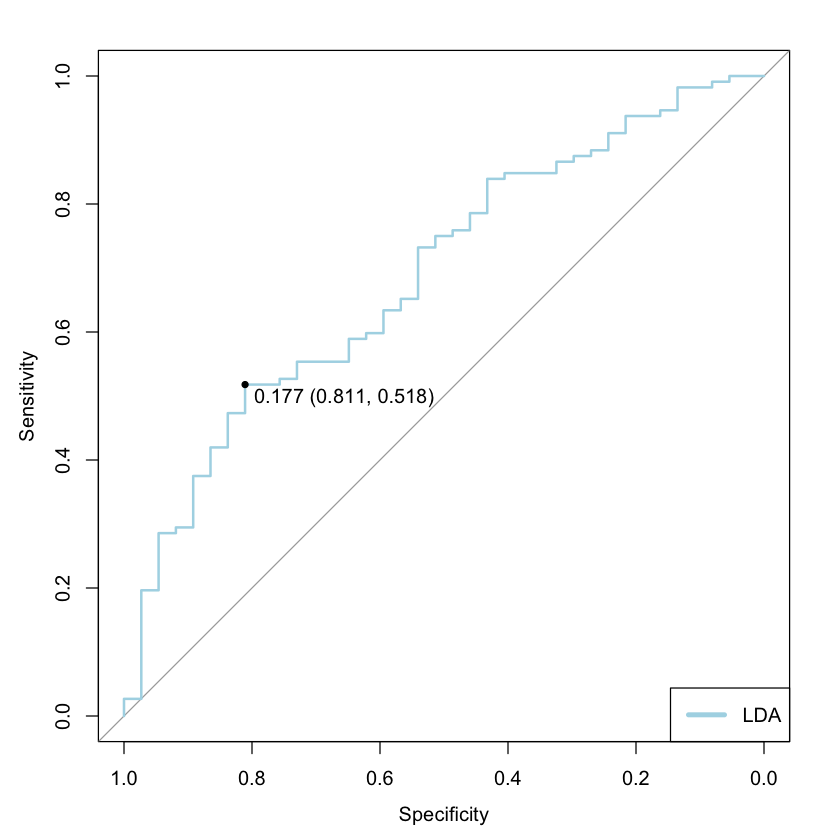

In [37]:
library(aplore3)
library(ggplot2)

mydata<-glow_bonemed
head(mydata)
names(mydata)

#?glow_bonemed

library(caret)
fitControl<-trainControl(method="repeatedcv",number=5,repeats=1,classProbs=TRUE, summaryFunction=mnLogLoss)
set.seed(1234)

mydata_clean = subset(mydata, select = -c(sub_id,site_id,phy_id,bmi))

names(mydata)
names(mydata_clean)

# Split into train / test using caret
set.seed(123)
trainIndex <- createDataPartition(mydata_clean$fracture, p = .7, list = FALSE)
train <- mydata_clean[trainIndex, ]
test <- mydata_clean[-trainIndex, ]

#LDA
lda.fit<-train(fracture~.,
               data=train,
               method="lda",
               trControl=fitControl,
               metric="logLoss")


#Computing predicted probabilities on the training data
predictions <- predict(lda.fit, test, type = "prob")[,"Yes"]

#Getting confusion matrix
threshold=0.177
lda.preds<-factor(ifelse(predictions>threshold,"Yes","No"),levels=c("Yes","No"))
lda.conf <- confusionMatrix(data = lda.preds, reference = test$fracture, mode = "everything")

#QDA
qda.fit<-train(fracture~.,
               data=train,
               method="qda",
               trControl=fitControl,
               metric="logLoss")


#Computing predicted probabilities on the training data
predictions <- predict(qda.fit, test, type = "prob")[,"Yes"]

#Getting confusion matrix
threshold=0.096
qda.preds<-factor(ifelse(predictions>threshold,"Yes","No"),levels=c("Yes","No"))
confusionMatrix(data = qda.preds, reference = test$fracture, mode = "everything")


library(pROC)
#Predicting probabilities on the test data
lda.predprobs <- predict(lda.fit, test, type="prob")
lda.roc<-roc(response=test$fracture,predictor=lda.predprobs[,2],levels=c("Yes","No"))

qda.predprobs <- predict(qda.fit, test, type="prob")
qda.roc<-roc(response=test$fracture,predictor=qda.predprobs[,2],levels=c("Yes","No"))


plot(lda.roc, print.thres="best", col="lightblue")
#plot(qda.roc, print.thres="best", col="red", add=T)
legend("bottomright",
       legend=c("LDA"),
       col=c("lightblue"),
       lwd=4, cex =1, xpd = TRUE, horiz = FALSE)


auc(lda.roc)
auc(qda.roc)

### Nonparametric

In [38]:
bone2 = subset(bone, select = -c(fracture.num))

set.seed(123)
trainIndex <- createDataPartition(bone2$fracture, p = .7, list = FALSE)
train <- bone2[trainIndex, ]
test <- bone2[-trainIndex, ]

In [39]:
# Define the grid of hyperparameters to search
tune_grid <- expand.grid(kmax = 1:20, distance = 1:3, kernel = 'optimal')

# Train the KNN model with the hyperparameter grid
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
knn_model <- train(fracture ~ ., data = train, method = "kknn", trControl = control, tuneGrid = tune_grid)


print(knn_model)
# Print the best model
print(knn_model$bestTune)

k-Nearest Neighbors 

351 samples
 17 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 316, 316, 316, 316, 315, 315, ... 
Resampling results across tuning parameters:

  kmax  distance  Accuracy   Kappa    
   1    1         0.8270682  0.5149114
   1    2         0.8307703  0.5188972
   1    3         0.8175179  0.4659590
   2    1         0.8270682  0.5149114
   2    2         0.8307703  0.5188972
   2    3         0.8175179  0.4659590
   3    1         0.8270682  0.5149114
   3    2         0.8307703  0.5188972
   3    3         0.8175179  0.4659590
   4    1         0.8270682  0.5149114
   4    2         0.8307703  0.5188972
   4    3         0.8175179  0.4659590
   5    1         0.8394009  0.5266385
   5    2         0.8317756  0.5173301
   5    3         0.8204015  0.4677340
   6    1         0.8375241  0.5164199
   6    2         0.8288904  0.5061824
   6    3         0.8222782  0.4681892
   

Setting direction: controls < cases



Area under the curve: 0.9114

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  107  13
       Yes   5  24
                                          
               Accuracy : 0.8792          
                 95% CI : (0.8158, 0.9268)
    No Information Rate : 0.7517          
    P-Value [Acc > NIR] : 8.64e-05        
                                          
                  Kappa : 0.6511          
                                          
 Mcnemar's Test P-Value : 0.09896         
                                          
            Sensitivity : 0.6486          
            Specificity : 0.9554          
         Pos Pred Value : 0.8276          
         Neg Pred Value : 0.8917          
             Prevalence : 0.2483          
         Detection Rate : 0.1611          
   Detection Prevalence : 0.1946          
      Balanced Accuracy : 0.8020          
                                          
       'Positive' Class : Yes             
                              

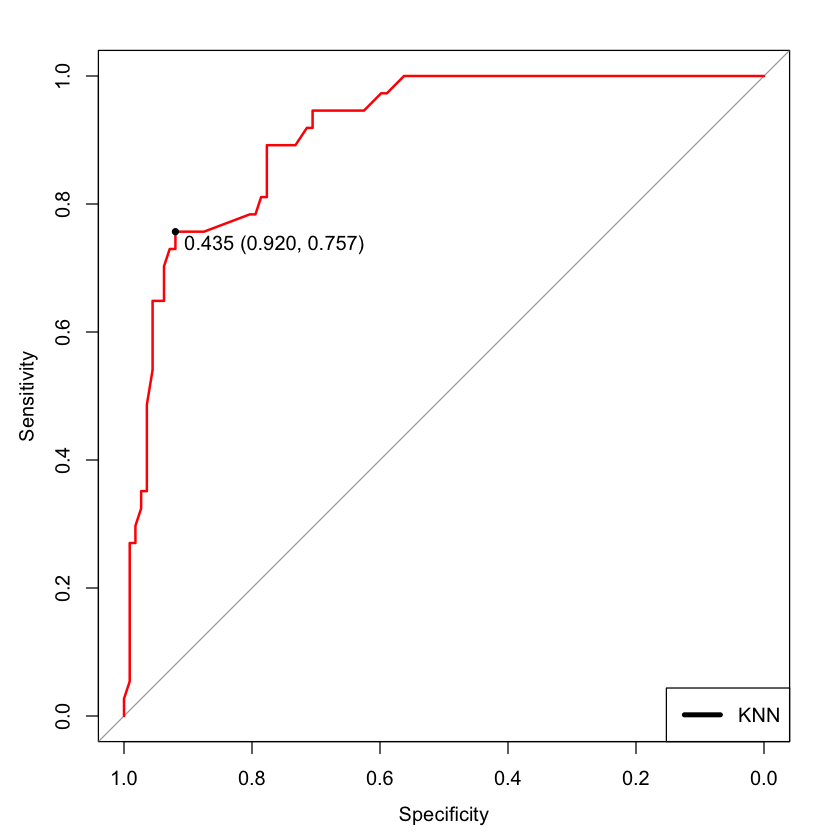

In [40]:
# KNN model training control
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
tune_grid <- expand.grid(kmax = 20, distance = 1, kernel = 'optimal')
knn_model <- train(fracture ~ ., data = train, method = "kknn", trControl = control, tuneGrid = tune_grid)

#Predictions on test
knn_probs <- predict(knn_model, test, type = "prob")$Yes
knn_roc <- roc(response = test$fracture, predictor = knn_probs, levels = c("No", "Yes"))

plot(knn_roc,print.thres="best",col="red")
legend("bottomright", legend=c("KNN"), col=c( "black"), lwd=4, cex =1, xpd = TRUE, horiz = FALSE)

auc(knn_roc)

# Confusion Matrix
knn_probs <- predict(knn_model, test, type = "raw") #Not needed for caret
knn_conf <- confusionMatrix(knn_probs, test$fracture, positive = "Yes")
knn_conf

### Model Comparisons (ROC Curves)

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> KNN </td>
   <td style="text-align:right;"> 0.911 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Complex Logistic Regression </td>
   <td style="text-align:right;"> 0.696 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Simple Logistic Regression </td>
   <td style="text-align:right;"> 0.694 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> LDA </td>
   <td style="text-align:right;"> 0.689 </td>
  </tr>
</tbody>
</table>

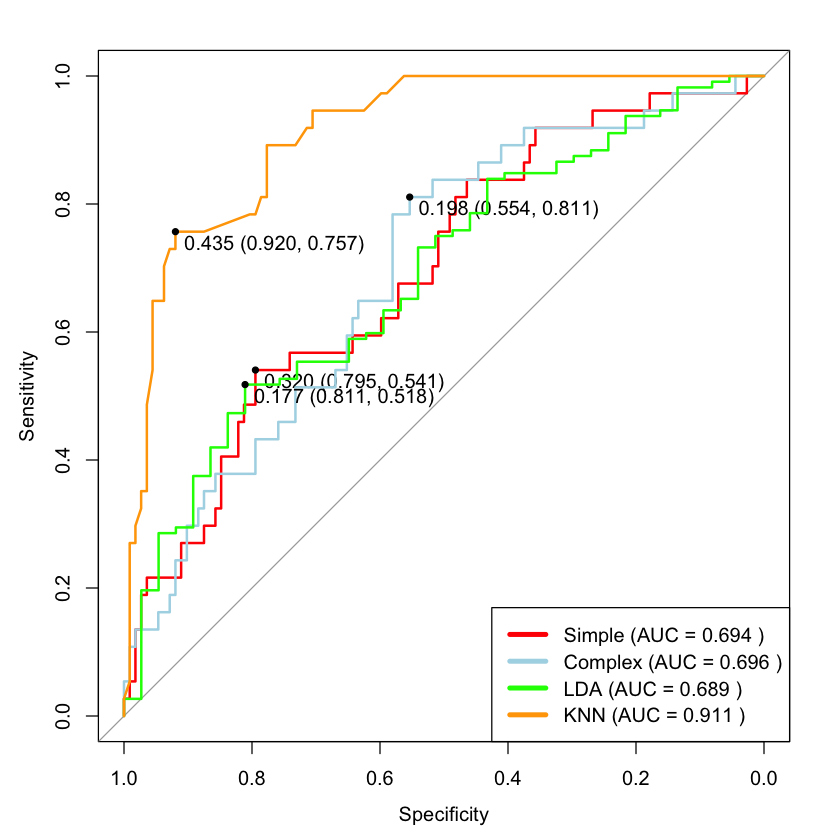

In [41]:
# Create AUC strings for legend
auc_values <- c(
  paste("Simple (AUC =", round(auc(logit.roc), 3), ")"),
  paste("Complex (AUC =", round(auc(complex.roc), 3), ")"),
  paste("LDA (AUC =", round(auc(lda.roc), 3), ")"),  #add QDA/LDA here
  paste("KNN (AUC =", round(auc(knn_roc), 3), ")")
)

plot(logit.roc, print.thres = "best", col = "red")
plot(complex.roc, print.thres = "best", add = TRUE, col = "lightblue")
plot(lda.roc, print.thres = "best", add = TRUE, col = "green")
plot(knn_roc, print.thres = "best", add = TRUE, col = "orange")

# Updated legend
legend("bottomright",
       legend = auc_values,   # Use the updated AUC values for legend
       col = c("red", "lightblue", "green", "orange"),
       lwd = 4, 
       cex = 1,
       xpd = TRUE,
       horiz = FALSE
)

# AUROC
# Create a data frame
auc_df <- data.frame(
  Model = c("Simple Logistic Regression", "Complex Logistic Regression","LDA", "KNN"),
  AUC = c(auc(logit.roc), auc(complex.roc),auc(lda.roc), auc(knn_roc))
)
# Print the data frame
auc_df %>%
    arrange(desc(AUC)) %>%
    kable(digits = 3) %>%
    kable_styling(bootstrap_options = "striped", full_width = F)

## Conclusion

In [42]:
# Error Metrics
  # Sensitivity, Specificity, Prevalence, PPV, NPV, and AUROC

print('Simple Logistic Regression: ')
logit.conf$byClass
auc(logit.roc)

print('Complex Logistic Regression: ')
complex.conf$byClass
auc(complex.roc)

print('LDA: ')
lda.conf$byClass
auc(lda.roc)

print('KNN: ')
knn_conf$byClass
auc(knn_roc)

[1] "Simple Logistic Regression: "


Sensitivity          Specificity       Pos Pred Value 
           0.5405405            0.7946429            0.4651163 
      Neg Pred Value            Precision               Recall 
           0.8396226            0.4651163            0.5405405 
                  F1           Prevalence       Detection Rate 
           0.5000000            0.2483221            0.1342282 
Detection Prevalence    Balanced Accuracy 
           0.2885906            0.6675917

Area under the curve: 0.6935

[1] "Complex Logistic Regression: "


Sensitivity          Specificity       Pos Pred Value 
           0.4864865            0.7321429            0.3750000 
      Neg Pred Value            Precision               Recall 
           0.8118812            0.3750000            0.4864865 
                  F1           Prevalence       Detection Rate 
           0.4235294            0.2483221            0.1208054 
Detection Prevalence    Balanced Accuracy 
           0.3221477            0.6093147

Area under the curve: 0.6957

[1] "LDA: "


Sensitivity          Specificity       Pos Pred Value 
           0.5178571            0.8108108            0.8923077 
      Neg Pred Value            Precision               Recall 
           0.3571429            0.8923077            0.5178571 
                  F1           Prevalence       Detection Rate 
           0.6553672            0.7516779            0.3892617 
Detection Prevalence    Balanced Accuracy 
           0.4362416            0.6643340

Area under the curve: 0.6889

[1] "KNN: "


Sensitivity          Specificity       Pos Pred Value 
           0.6486486            0.9553571            0.8275862 
      Neg Pred Value            Precision               Recall 
           0.8916667            0.8275862            0.6486486 
                  F1           Prevalence       Detection Rate 
           0.7272727            0.2483221            0.1610738 
Detection Prevalence    Balanced Accuracy 
           0.1946309            0.8020029

Area under the curve: 0.9114